<a href="https://colab.research.google.com/github/Kim-ahhyeon/Computer-Vision/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [실험 A] 손실 함수 비교 : CrossEntropy Loss vs MSE Loss (with softmax)
## 1) 실험 목표
  -  MSE와 CrossEntropy가 학습 성능에 미치는 차이 분석
  - 학습 곡선의 수렴 속도, 정확도, loss 안정성 비교



[CrossEntropy] Epoch 1/30, Loss: 0.4953, Acc: 84.67%
[CrossEntropy] Epoch 2/30, Loss: 0.3676, Acc: 86.46%
[CrossEntropy] Epoch 3/30, Loss: 0.3303, Acc: 85.81%
[CrossEntropy] Epoch 4/30, Loss: 0.3049, Acc: 87.33%
[CrossEntropy] Epoch 5/30, Loss: 0.2852, Acc: 86.63%
[CrossEntropy] Epoch 6/30, Loss: 0.2684, Acc: 87.28%
[CrossEntropy] Epoch 7/30, Loss: 0.2554, Acc: 87.74%
[CrossEntropy] Epoch 8/30, Loss: 0.2444, Acc: 87.93%
[CrossEntropy] Epoch 9/30, Loss: 0.2310, Acc: 88.03%
[CrossEntropy] Epoch 10/30, Loss: 0.2223, Acc: 86.99%
[CrossEntropy] Epoch 11/30, Loss: 0.2110, Acc: 88.32%
[CrossEntropy] Epoch 12/30, Loss: 0.2024, Acc: 88.86%
[CrossEntropy] Epoch 13/30, Loss: 0.1911, Acc: 88.00%
[CrossEntropy] Epoch 14/30, Loss: 0.1836, Acc: 88.86%
[CrossEntropy] Epoch 15/30, Loss: 0.1738, Acc: 88.46%
[CrossEntropy] Epoch 16/30, Loss: 0.1700, Acc: 89.02%
[CrossEntropy] Epoch 17/30, Loss: 0.1591, Acc: 88.45%
[CrossEntropy] Epoch 18/30, Loss: 0.1555, Acc: 88.58%
[CrossEntropy] Epoch 19/30, Loss: 0.1

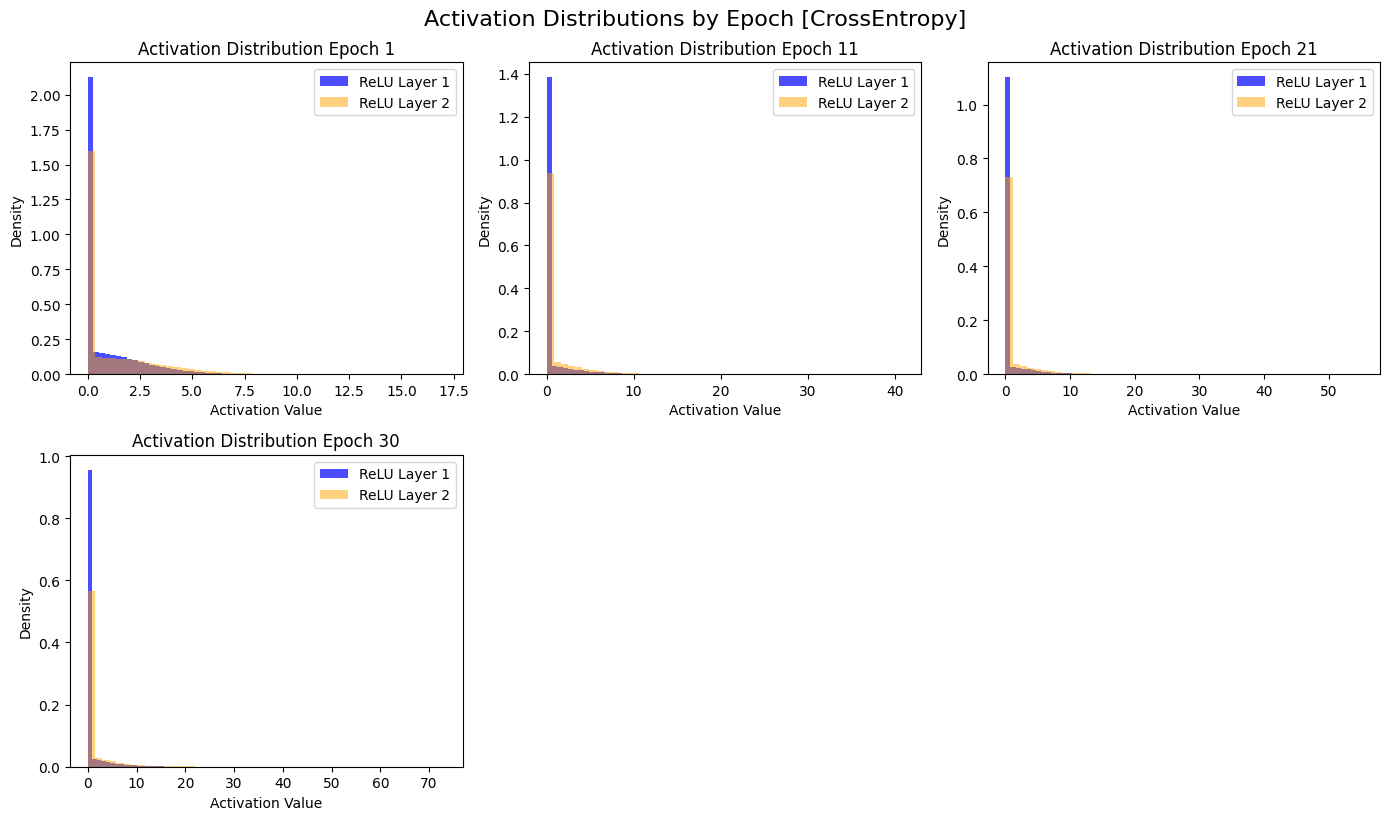

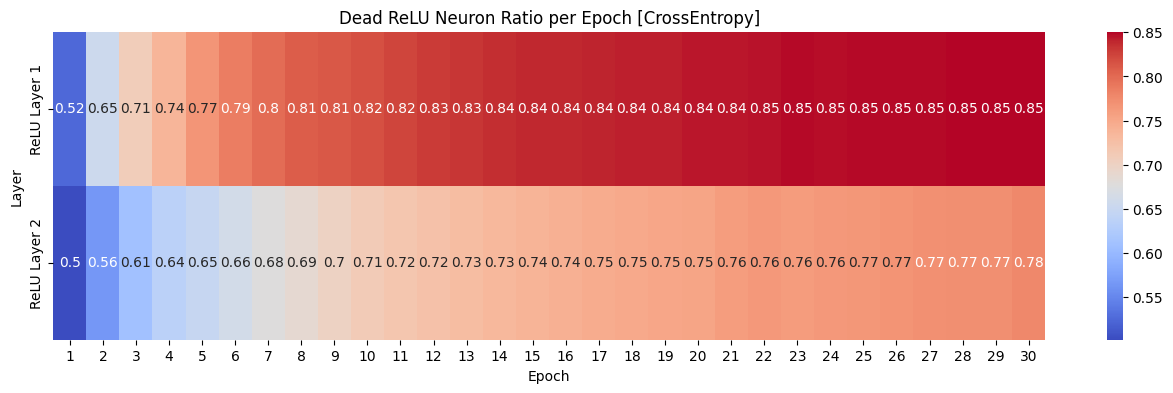

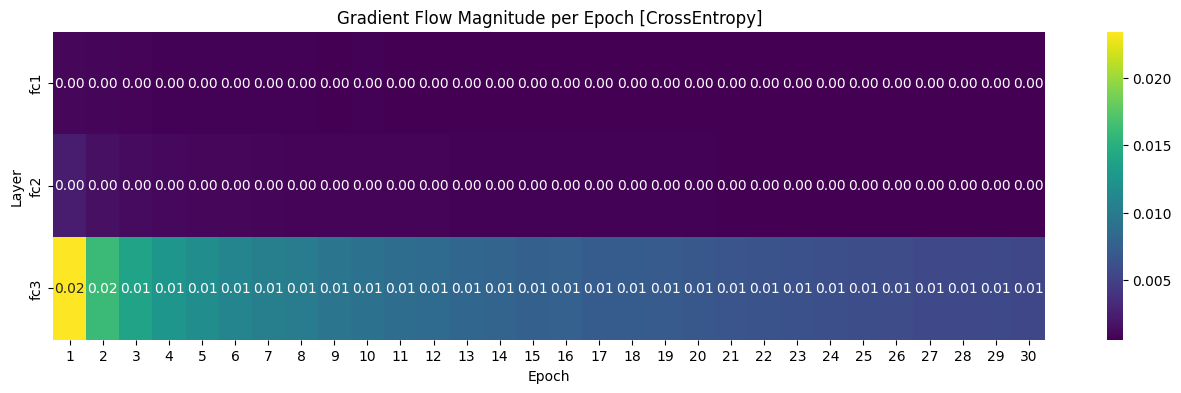

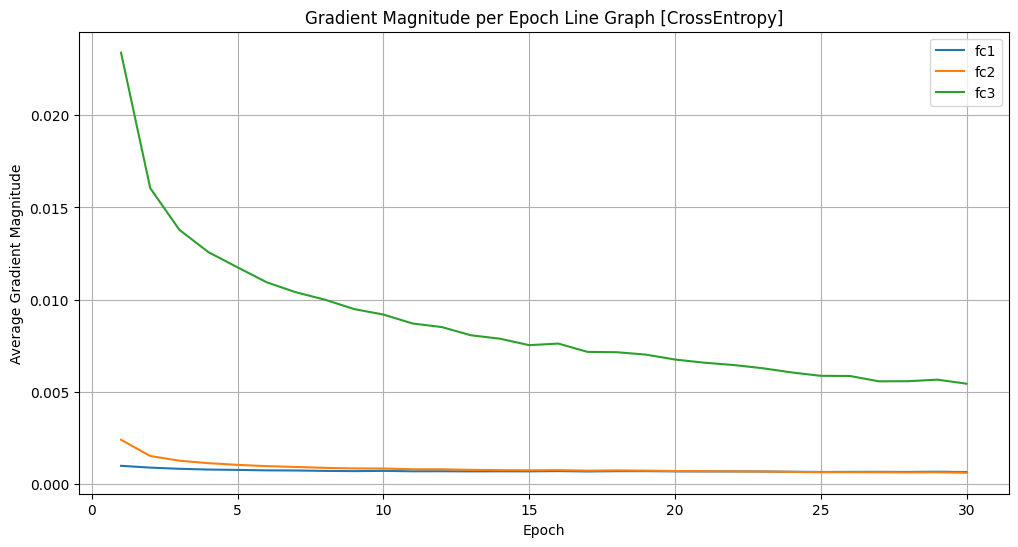

[MSE with Softmax] Epoch 1/30, Loss: 0.0259, Acc: 81.29%
[MSE with Softmax] Epoch 2/30, Loss: 0.0200, Acc: 85.37%
[MSE with Softmax] Epoch 3/30, Loss: 0.0183, Acc: 86.07%
[MSE with Softmax] Epoch 4/30, Loss: 0.0170, Acc: 87.18%
[MSE with Softmax] Epoch 5/30, Loss: 0.0161, Acc: 87.41%
[MSE with Softmax] Epoch 6/30, Loss: 0.0154, Acc: 87.19%
[MSE with Softmax] Epoch 7/30, Loss: 0.0148, Acc: 86.74%
[MSE with Softmax] Epoch 8/30, Loss: 0.0143, Acc: 87.91%
[MSE with Softmax] Epoch 9/30, Loss: 0.0137, Acc: 87.87%
[MSE with Softmax] Epoch 10/30, Loss: 0.0131, Acc: 88.71%
[MSE with Softmax] Epoch 11/30, Loss: 0.0128, Acc: 88.15%
[MSE with Softmax] Epoch 12/30, Loss: 0.0123, Acc: 88.15%
[MSE with Softmax] Epoch 13/30, Loss: 0.0121, Acc: 88.32%
[MSE with Softmax] Epoch 14/30, Loss: 0.0116, Acc: 87.85%
[MSE with Softmax] Epoch 15/30, Loss: 0.0113, Acc: 88.52%
[MSE with Softmax] Epoch 16/30, Loss: 0.0110, Acc: 88.96%
[MSE with Softmax] Epoch 17/30, Loss: 0.0107, Acc: 88.44%
[MSE with Softmax] Epoc

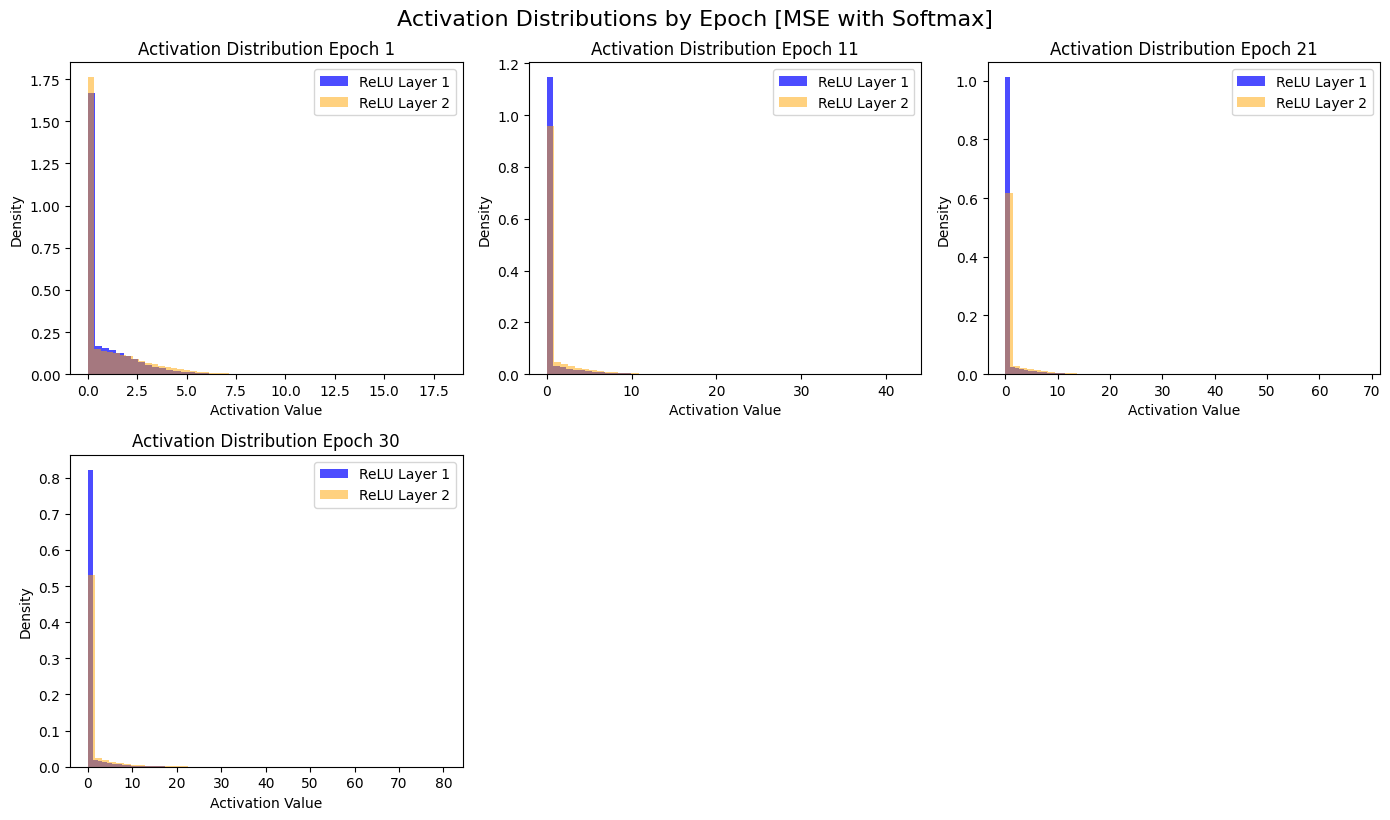

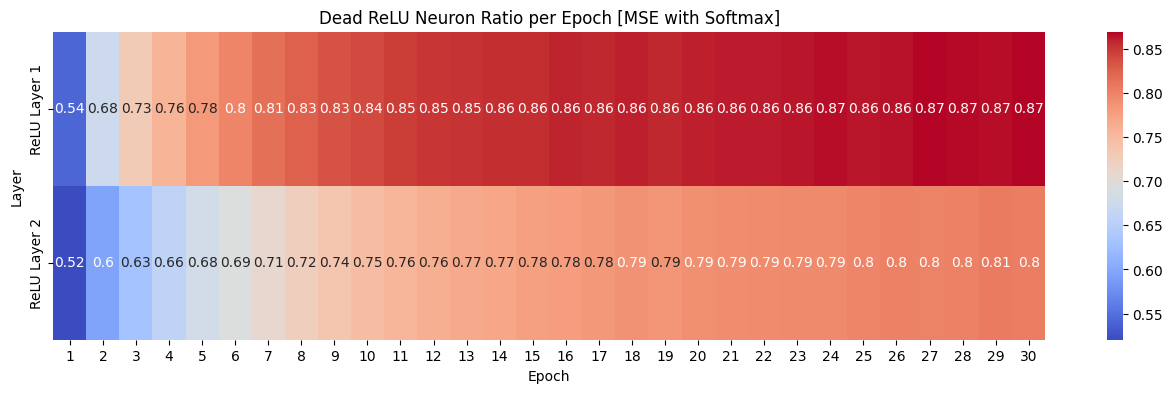

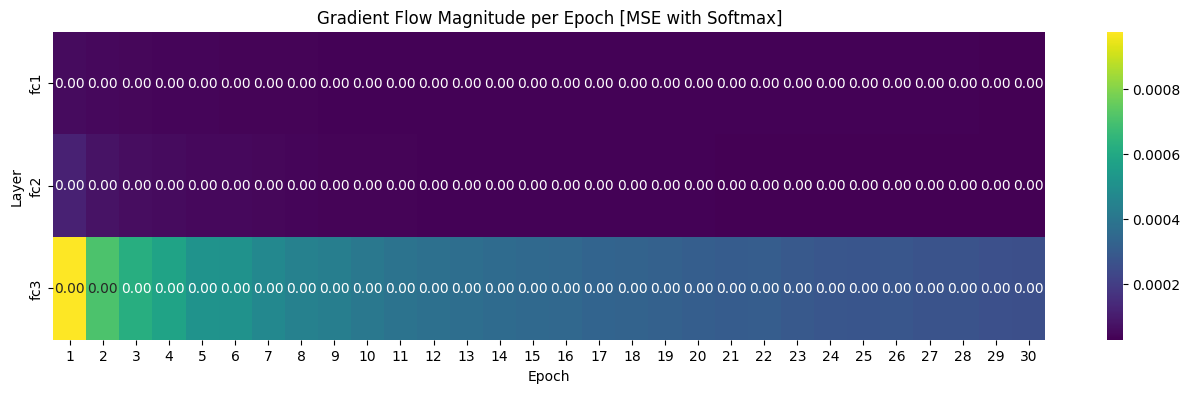

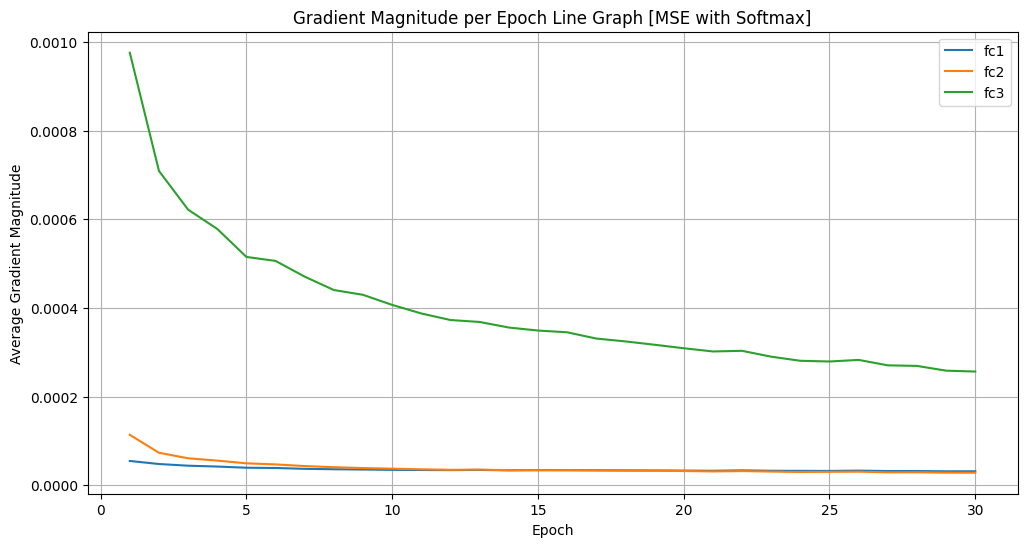

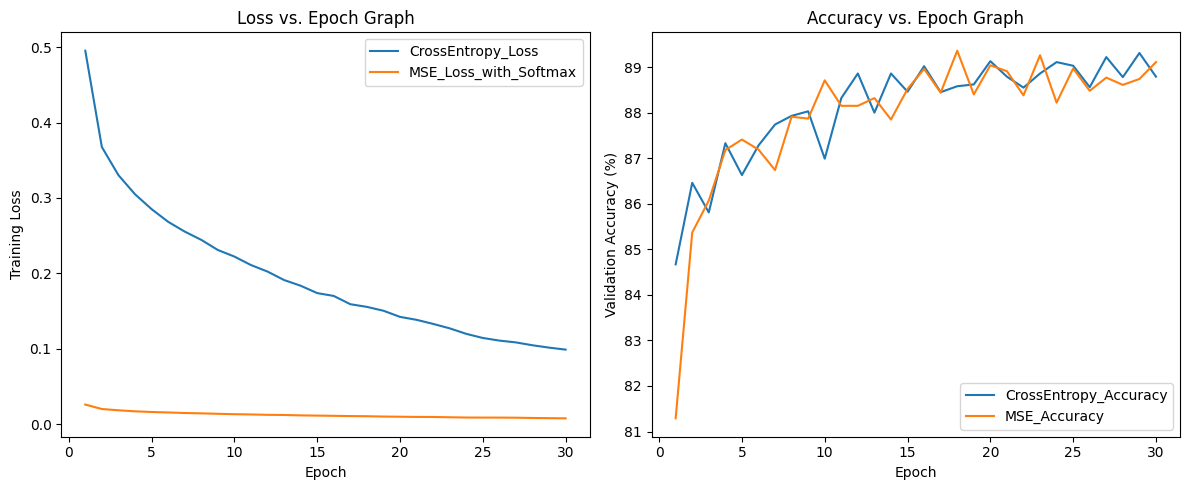


실험 항목		최종 정확도 (%)	Loss 최솟값	수렴까지 걸린 epoch 수
------------------------------------------------------------
CrossEntropy		88.79		0.0988	30
MSE (with softmax)	89.11		0.0077	30


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') # GPU가 가능하다면 CUDA 사용
batch_size = 64 # 학습시 한 번에 처리하는 데이터 수
num_epochs = 30 # 학습하는 전체 에포크 수
learning_rate = 0.001 # 학습률
input_size = 28 * 28 # 이미지 크기
num_classes = 10 # 분류 클래스 수

# 데이터 전처리
transform = transforms.Compose([
    transforms.ToTensor(), # 이미지를 텐서로 변환한다.
    transforms.Normalize((0.5,), (0.5,)) # 평균=0.5, 표준편차 0.5로 스케일링
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.FashionMNIST(root='./data', train=False, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # 학습용
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False) # 테스트용

# 모델 정의
class MLP(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 256), # 입력층->은닉층1
            nn.ReLU(), # 활성화 함수
            nn.Linear(256, 128), # 은닉층1->은닉층2
            nn.ReLU(),
            nn.Linear(128, num_classes) # 은닉층2->출력층
        )

    def forward(self, x, capture_activations=False):  # 중간 활성화값 추출
        x = self.model[0](x)     # fc1
        a1 = self.model[1](x)    # ReLU1
        x = self.model[2](a1)    # fc2
        a2 = self.model[3](x)    # ReLU2
        x = self.model[4](a2)    # fc3 출력층

        if capture_activations:
            return x, a1, a2
        else:
            return x

# One-hot 인코딩 함수
def one_hot(labels, num_classes):
    device = labels.device
    return torch.eye(num_classes, device=device)[labels]

def run_experiment(loss_fn, use_softmax, use_onehot, title):
    model = MLP(input_size, num_classes).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    train_losses, val_accuracies = [], []

    dead_relu_ratios_epoch = []
    grad_magnitudes_epoch = []

    # 활성화 분포 저장용 (epoch 별, batch 당 a1, a2 값 리스트)
    activations_epoch = []

    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0 # 에포크 손실 초기화

        dead_relu_ratios_batch = []
        grad_magnitudes_batch = []

        # 이번 epoch에서 활성화들을 모으기 위한 리스트
        a1_all_batches = []
        a2_all_batches = []

        for images, labels in train_loader:
            images = images.view(-1, input_size).to(device) # 28X28=784로 flatten
            labels = labels.to(device)

            if use_onehot: # 라벨 one-hot으로 변환한다.
                labels = one_hot(labels, num_classes)

            optimizer.zero_grad()

            outputs, a1, a2 = model(images, capture_activations=True)

            if use_softmax: # softmax를 적용한다.
                outputs = torch.softmax(outputs, dim=1)

            loss = loss_fn(outputs, labels)
            loss.backward()

            grads = [
                model.model[0].weight.grad.abs().mean().item(),
                model.model[2].weight.grad.abs().mean().item(),
                model.model[4].weight.grad.abs().mean().item()
            ]
            grad_magnitudes_batch.append(grads)

            optimizer.step()
            epoch_loss += loss.item()

            dead1 = (a1 <= 0).float().mean().item()
            dead2 = (a2 <= 0).float().mean().item()
            dead_relu_ratios_batch.append([dead1, dead2])

            # 활성화값 저장 (cpu로 옮기고 numpy로 변환)
            a1_all_batches.append(a1.detach().cpu().numpy().flatten())
            a2_all_batches.append(a2.detach().cpu().numpy().flatten())

        avg_loss = epoch_loss / len(train_loader)
        train_losses.append(avg_loss)
        dead_relu_ratios_epoch.append(np.mean(dead_relu_ratios_batch, axis=0))
        grad_magnitudes_epoch.append(np.mean(grad_magnitudes_batch, axis=0))

        # 이 epoch의 모든 배치 활성화 합치기
        a1_epoch = np.concatenate(a1_all_batches)
        a2_epoch = np.concatenate(a2_all_batches)
        activations_epoch.append((a1_epoch, a2_epoch))

        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in test_loader:
                images = images.view(-1, input_size).to(device)
                labels = labels.to(device)
                outputs = model(images)
                if use_softmax:
                    outputs = torch.softmax(outputs, dim=1)
                predicted = torch.argmax(outputs, dim=1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        acc = 100 * correct / total
        val_accuracies.append(acc)
        print(f"[{title}] Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Acc: {acc:.2f}%")

    # 활성화 분포 시각화: 초반, 중반, 후반 선택
    checkpoints = [0, num_epochs // 3, (num_epochs * 2) // 3, num_epochs - 1]
    plt.figure(figsize=(14, 8))
    for i, epoch_idx in enumerate(checkpoints):
        a1_vals, a2_vals = activations_epoch[epoch_idx]
        plt.subplot(2, 3, i + 1)
        plt.hist(a1_vals, bins=50, alpha=0.7, label='ReLU Layer 1', color='blue', density=True)
        plt.hist(a2_vals, bins=50, alpha=0.5, label='ReLU Layer 2', color='orange', density=True)
        plt.title(f'Activation Distribution Epoch {epoch_idx+1}')
        plt.xlabel('Activation Value')
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.suptitle(f'Activation Distributions by Epoch [{title}]', y=1.02, fontsize=16)
    plt.show()

    # 히트맵 시각화: Dead ReLU 비율
    dead_relu_arr = np.array(dead_relu_ratios_epoch).T
    plt.figure(figsize=(16, 4))
    sns.heatmap(dead_relu_arr, annot=True, cmap="coolwarm", xticklabels=range(1, num_epochs + 1), yticklabels=["ReLU Layer 1", "ReLU Layer 2"])
    plt.title(f"Dead ReLU Neuron Ratio per Epoch [{title}]")
    plt.xlabel("Epoch")
    plt.ylabel("Layer")
    plt.show()

    # 히트맵 시각화: Gradient Magnitude
    grad_arr = np.array(grad_magnitudes_epoch).T
    plt.figure(figsize=(16, 4))
    sns.heatmap(grad_arr, annot=True, cmap="viridis", xticklabels=range(1, num_epochs + 1), yticklabels=["fc1", "fc2", "fc3"], fmt=".2f")
    plt.title(f"Gradient Flow Magnitude per Epoch [{title}]")
    plt.xlabel("Epoch")
    plt.ylabel("Layer")
    plt.show()

    plt.figure(figsize=(12, 6))
    layers = ["fc1", "fc2", "fc3"]
    for i in range(3):
        plt.plot(range(1, num_epochs + 1), grad_arr[i], label=layers[i])

    plt.title(f"Gradient Magnitude per Epoch Line Graph [{title}]")
    plt.xlabel("Epoch")
    plt.ylabel("Average Gradient Magnitude")
    plt.legend()
    plt.grid(True)
    plt.show()

    min_loss = min(train_losses)
    min_loss_epoch = train_losses.index(min_loss) + 1
    final_acc = val_accuracies[-1]

    return train_losses, val_accuracies, min_loss, final_acc, min_loss_epoch

# 실험 A-1: CrossEntropyLoss (내부 softmax 포함)
train_ce, acc_ce, min_loss_ce, final_acc_ce, min_epoch_ce = run_experiment(
    loss_fn=nn.CrossEntropyLoss(),
    use_softmax=False,
    use_onehot=False,
    title="CrossEntropy"
)

# 실험 A-2: MSELoss + softmax + one-hot
train_mse, acc_mse, min_loss_mse, final_acc_mse, min_epoch_mse = run_experiment(
    loss_fn=nn.MSELoss(),
    use_softmax=True,
    use_onehot=True,
    title="MSE with Softmax"
)

# 결과 시각화
epochs = range(1, num_epochs + 1) # 에폭 범위를 1부터 num_epochs까지 생성

plt.figure(figsize=(12, 5)) # 전체 그래프 크기 가로 12, 세로 5인치

# Loss Graph
plt.subplot(1, 2, 1)
plt.plot(epochs, train_ce, label="CrossEntropy_Loss") # CrossEntropy와 MSE Loss를 라인 그래프로 표시
plt.plot(epochs, train_mse, label="MSE_Loss_with_Softmax")
plt.xlabel("Epoch") # x축 레이블
plt.ylabel("Training Loss") # y축 레이블
plt.legend()
plt.title("Loss vs. Epoch Graph") # 그래프 제목

# Accuracy Graph
plt.subplot(1, 2, 2)
plt.plot(epochs, acc_ce, label="CrossEntropy_Accuracy") # CrossEntropy와 MSE Accuracy를 라인 그래프로 표시
plt.plot(epochs, acc_mse, label="MSE_Accuracy")
plt.xlabel("Epoch") # x축 레이블
plt.ylabel("Validation Accuracy (%)") # y축 레이블
plt.legend()
plt.title("Accuracy vs. Epoch Graph") # 그래프 제목

plt.tight_layout()
plt.show()

print("\n실험 항목\t\t최종 정확도 (%)\tLoss 최솟값\t수렴까지 걸린 epoch 수")
print("-" * 60)
print(f"CrossEntropy\t\t{final_acc_ce:.2f}\t\t{min_loss_ce:.4f}\t{min_epoch_ce}")
print(f"MSE (with softmax)\t{final_acc_mse:.2f}\t\t{min_loss_mse:.4f}\t{min_epoch_mse}")


# [실험 B] 활성화 함수 비교 :  ReLU vs LeakyReLU vs Sigmoid

## 1) 실험 목표
  - ReLU, LeakyReLU, Sigmoid가 학습에 미치는 영향을 분석
  - Dead ReLU 발생 유도 및 LeakyReLU의 완화 효과 확인

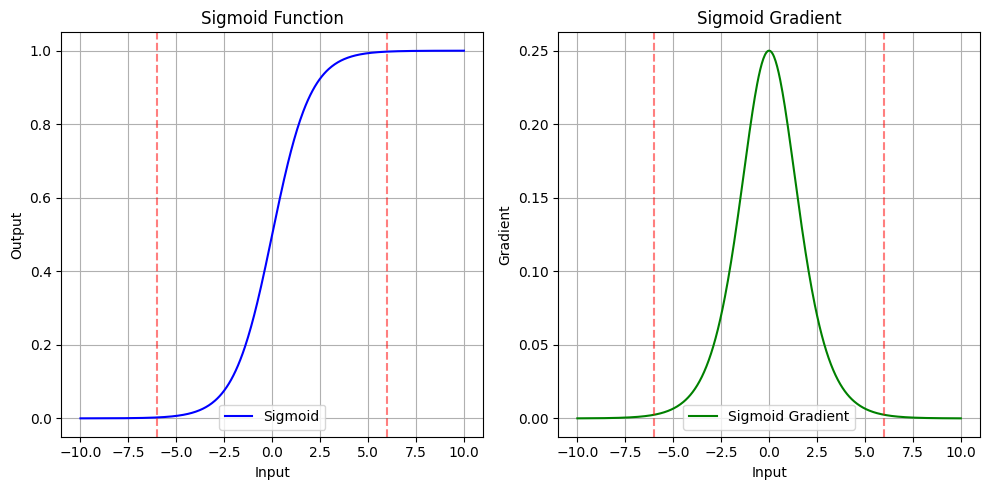


--- Training with RELU ---
relu Epoch [1/200] Loss: 0.6931 Acc: 0.8233
relu Epoch [11/200] Loss: 0.3467 Acc: 0.8733
relu Epoch [21/200] Loss: 0.2917 Acc: 0.8800
relu Epoch [31/200] Loss: 0.2079 Acc: 0.9300
relu Epoch [41/200] Loss: 0.0907 Acc: 0.9700
relu Epoch [51/200] Loss: 0.0604 Acc: 0.9733
relu Epoch [61/200] Loss: 0.0564 Acc: 0.9733
relu Epoch [71/200] Loss: 0.0541 Acc: 0.9733
relu Epoch [81/200] Loss: 0.0526 Acc: 0.9767
relu Epoch [91/200] Loss: 0.0509 Acc: 0.9767
relu Epoch [101/200] Loss: 0.0510 Acc: 0.9767
relu Epoch [111/200] Loss: 0.0496 Acc: 0.9733
relu Epoch [121/200] Loss: 0.0492 Acc: 0.9767
relu Epoch [131/200] Loss: 0.0489 Acc: 0.9767
relu Epoch [141/200] Loss: 0.0498 Acc: 0.9767
relu Epoch [151/200] Loss: 0.0483 Acc: 0.9767
relu Epoch [161/200] Loss: 0.0481 Acc: 0.9700
relu Epoch [171/200] Loss: 0.0475 Acc: 0.9767
relu Epoch [181/200] Loss: 0.0478 Acc: 0.9767
relu Epoch [191/200] Loss: 0.0483 Acc: 0.9700
relu Epoch [200/200] Loss: 0.0478 Acc: 0.9700


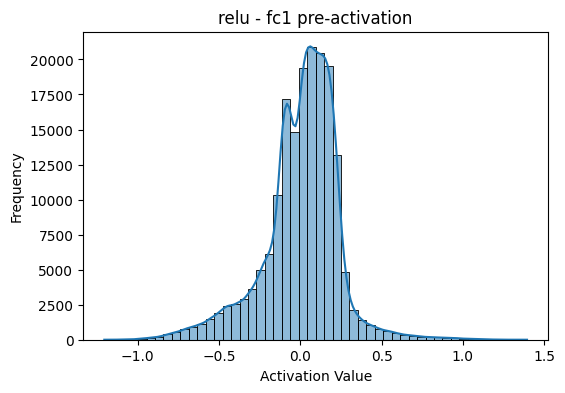

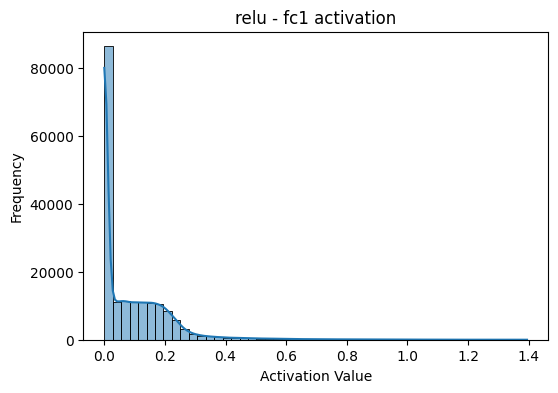

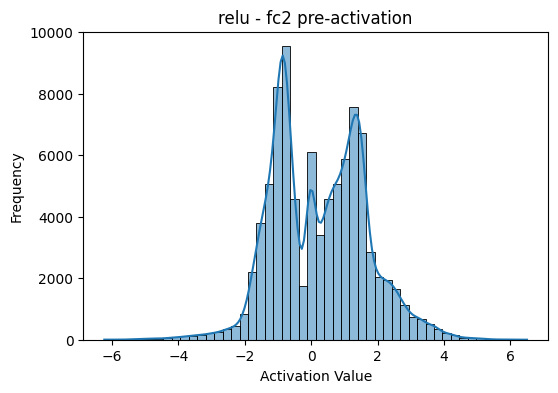

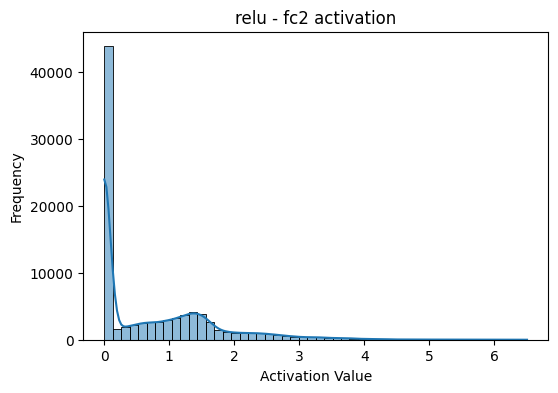

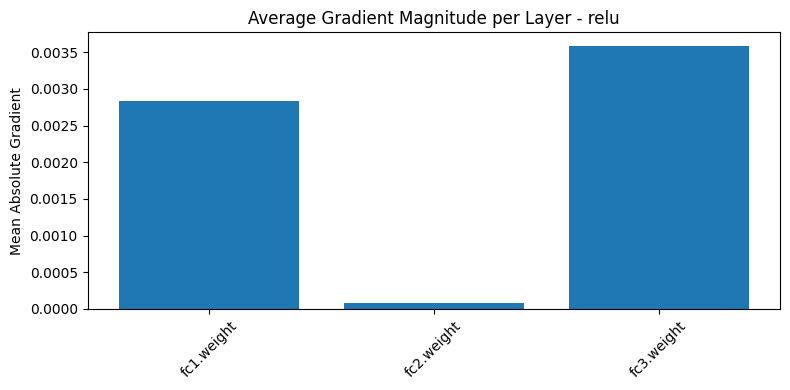

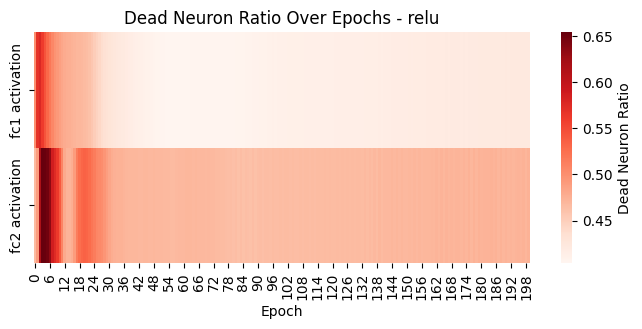


--- Training with LEAKYRELU ---
leakyrelu Epoch [1/200] Loss: 0.6931 Acc: 0.8300
leakyrelu Epoch [11/200] Loss: 0.3587 Acc: 0.8767
leakyrelu Epoch [21/200] Loss: 0.2922 Acc: 0.8633
leakyrelu Epoch [31/200] Loss: 0.2358 Acc: 0.9033
leakyrelu Epoch [41/200] Loss: 0.1333 Acc: 0.9733
leakyrelu Epoch [51/200] Loss: 0.0668 Acc: 0.9767
leakyrelu Epoch [61/200] Loss: 0.0573 Acc: 0.9733
leakyrelu Epoch [71/200] Loss: 0.0527 Acc: 0.9700
leakyrelu Epoch [81/200] Loss: 0.0499 Acc: 0.9700
leakyrelu Epoch [91/200] Loss: 0.0483 Acc: 0.9700
leakyrelu Epoch [101/200] Loss: 0.0472 Acc: 0.9700
leakyrelu Epoch [111/200] Loss: 0.0448 Acc: 0.9700
leakyrelu Epoch [121/200] Loss: 0.0441 Acc: 0.9733
leakyrelu Epoch [131/200] Loss: 0.0435 Acc: 0.9700
leakyrelu Epoch [141/200] Loss: 0.0437 Acc: 0.9733
leakyrelu Epoch [151/200] Loss: 0.0409 Acc: 0.9700
leakyrelu Epoch [161/200] Loss: 0.0403 Acc: 0.9700
leakyrelu Epoch [171/200] Loss: 0.0393 Acc: 0.9700
leakyrelu Epoch [181/200] Loss: 0.0441 Acc: 0.9733
leakyrelu

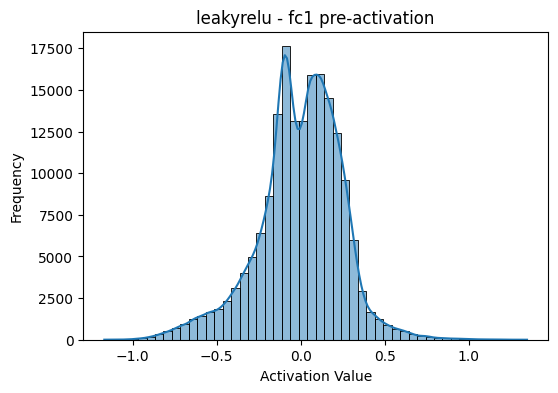

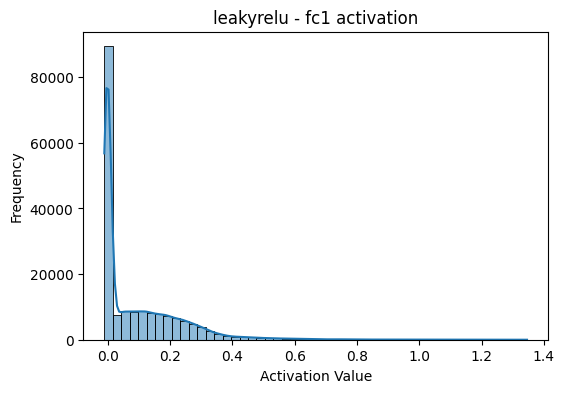

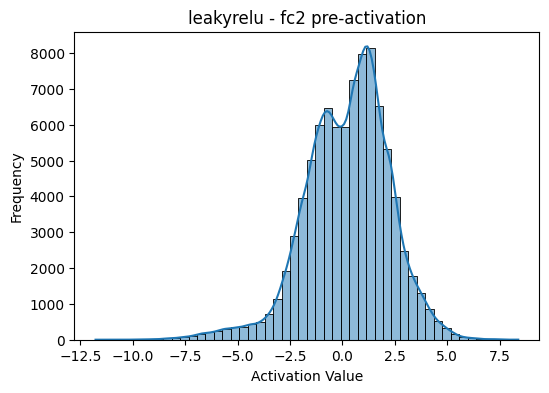

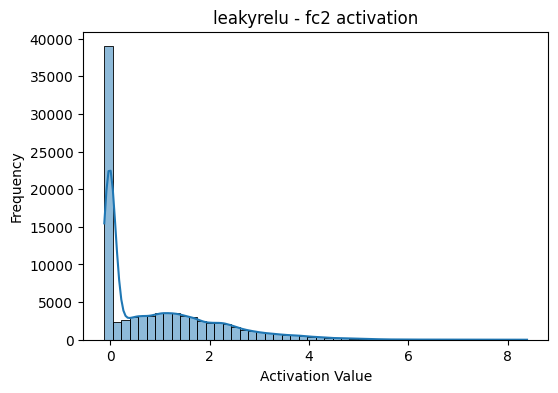

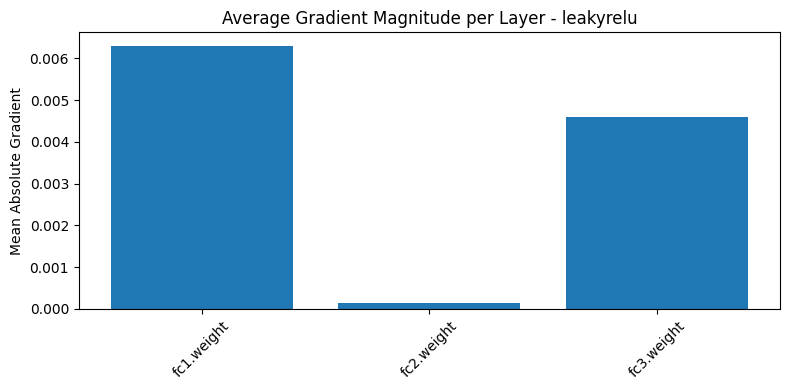

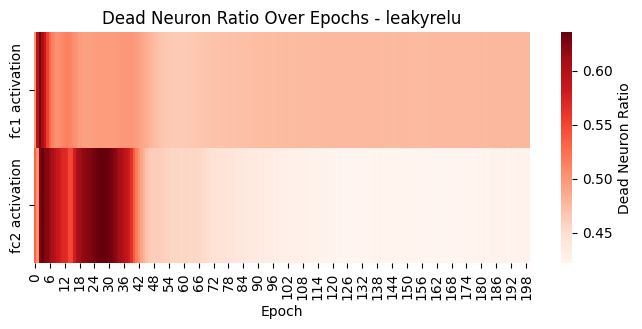


--- Training with SIGMOID ---
sigmoid Epoch [1/200] Loss: 0.6936 Acc: 0.4800
sigmoid Epoch [11/200] Loss: 0.6898 Acc: 0.5200
sigmoid Epoch [21/200] Loss: 0.6894 Acc: 0.8133
sigmoid Epoch [31/200] Loss: 0.6719 Acc: 0.5200
sigmoid Epoch [41/200] Loss: 0.5826 Acc: 0.5767
sigmoid Epoch [51/200] Loss: 0.4812 Acc: 0.8600
sigmoid Epoch [61/200] Loss: 0.4203 Acc: 0.8600
sigmoid Epoch [71/200] Loss: 0.3882 Acc: 0.8600
sigmoid Epoch [81/200] Loss: 0.3696 Acc: 0.8600
sigmoid Epoch [91/200] Loss: 0.3573 Acc: 0.8600
sigmoid Epoch [101/200] Loss: 0.3484 Acc: 0.8633
sigmoid Epoch [111/200] Loss: 0.3422 Acc: 0.8600
sigmoid Epoch [121/200] Loss: 0.3372 Acc: 0.8567
sigmoid Epoch [131/200] Loss: 0.3330 Acc: 0.8567
sigmoid Epoch [141/200] Loss: 0.3291 Acc: 0.8600
sigmoid Epoch [151/200] Loss: 0.3248 Acc: 0.8700
sigmoid Epoch [161/200] Loss: 0.3194 Acc: 0.8700
sigmoid Epoch [171/200] Loss: 0.3115 Acc: 0.8833
sigmoid Epoch [181/200] Loss: 0.3001 Acc: 0.8900
sigmoid Epoch [191/200] Loss: 0.2846 Acc: 0.9000


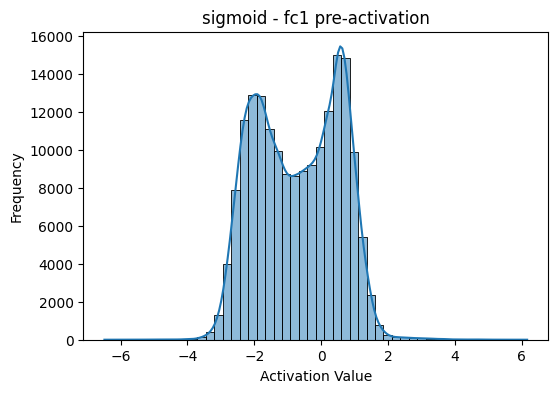

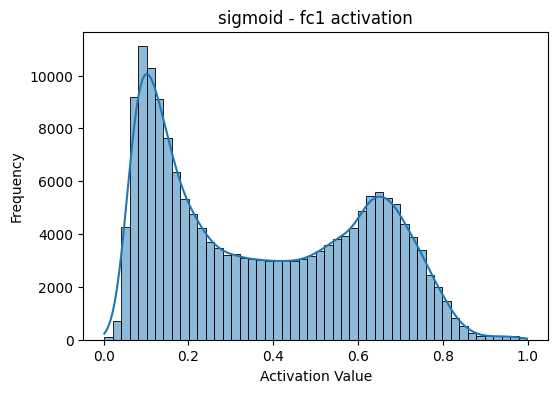

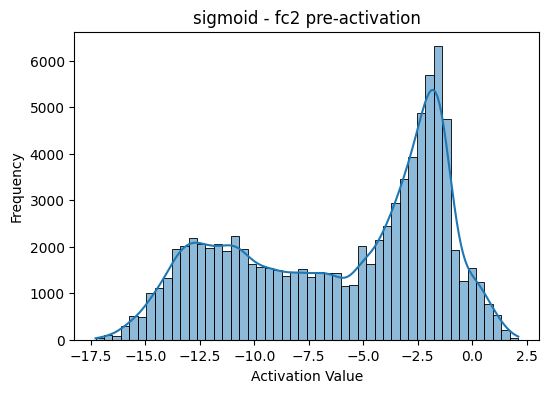

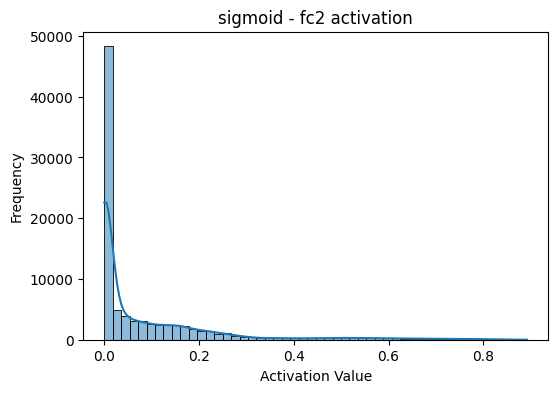

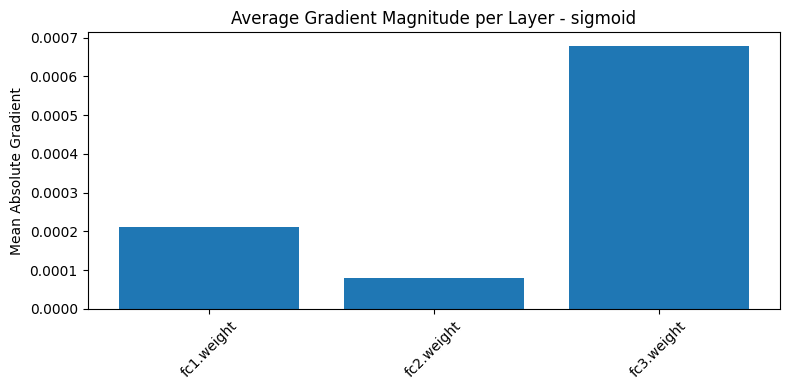

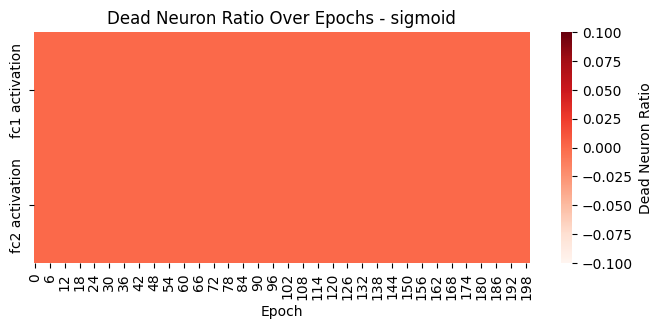


Activation Function Comparison:
활성화 함수	Dead ReLU 비율(%) Layer1	Dead ReLU 비율(%) Layer2	최종 정확도(%)	수렴 속도 (Epoch @ Loss≤0.1)
---------------------------------------------------------------------------------------------
Relu           42.20			47.36			97.00		40
Leakyrelu      47.77			42.59			97.33		44
Sigmoid        0.00			0.00			91.00		200


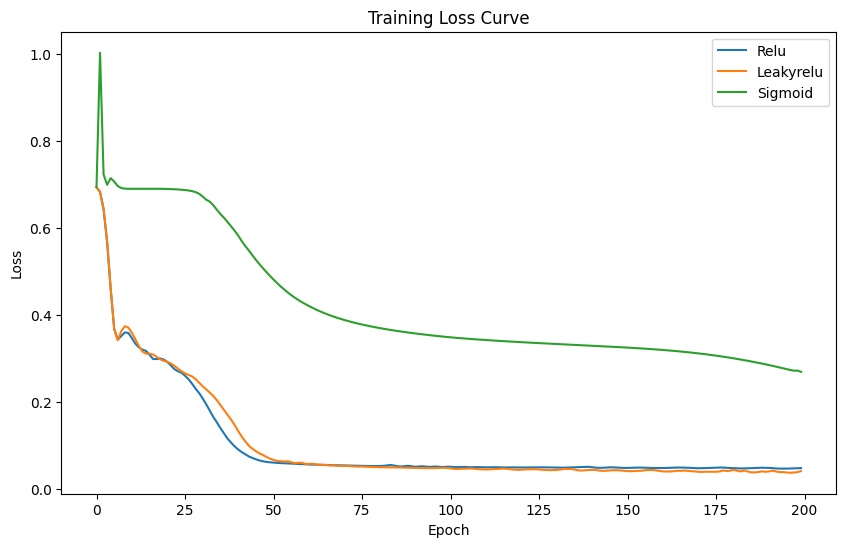

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터셋 생성 및 전처리
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

# 데이터셋을 학습용과 테스트용으로 7:3 비율로 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 학습 데이터에 대해 평균 0, 표준편차 1로 표준화 (테스트 데이터에도 동일 스케일 적용)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 넘파이 배열을 PyTorch 텐서로 변환
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

input_size = 2 # 입력 특성 개수 (x,y 좌표 2개)
num_classes = 2 # 분류할 클래스 수 (0 or 1)

# 네트워크 정의 (활성화 함수만 다르게 하여 실험)
class SimpleNN(nn.Module):
    def __init__(self, activation='relu'):
        super().__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)

        # 활성화 함수 선택
        if activation == 'relu':
            self.activation = nn.ReLU()
        elif activation == 'leakyrelu':
            self.activation = nn.LeakyReLU(0.01)
        elif activation == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            raise ValueError("Unsupported activation")

    def forward(self, x):
        out1 = self.fc1(x)  # 첫 번째 선형 변환 (입력 → fc1)
        act1 = self.activation(out1) # 첫 번째 활성화 함수 적용
        out2 = self.fc2(act1) # 두 번째 선형 변환 (fc1 출력을 fc2에 입력)
        act2 = self.activation(out2) # 두 번째 활성화 함수 적용
        out3 = self.fc3(act2) # 출력층 선형 변환
        return out3, [out1, act1, out2, act2]  # 중간 레이어 출력값 반환

# weight 초기화 함수 (std=0.01)
def weight_init(m):
    if isinstance(m, nn.Linear):
        nn.init.normal_(m.weight, mean=0.0, std=0.01)
        nn.init.constant_(m.bias, 0)

# Dead neuron 비율 계산 함수 (ReLU 계열용)
def dead_neuron_ratio(activations):
    # ReLU이면 음수 값은 dead neuron
    dead_ratios = []
    for layer_act in activations:
        if isinstance(layer_act, torch.Tensor):
            dead = (layer_act <= 0).float().mean().item()
            dead_ratios.append(dead)
    return dead_ratios

# 활성화 분포 시각화 함수 (히스토그램)
def plot_activation_distribution(activations, activation_name):
    layer_names = ['fc1 pre-activation', 'fc1 activation', 'fc2 pre-activation', 'fc2 activation']
    for i, act in enumerate(activations):
        plt.figure(figsize=(6,4))
        sns.histplot(act.detach().cpu().numpy().flatten(), bins=50, kde=True)
        plt.title(f'{activation_name} - {layer_names[i]}')
        plt.xlabel('Activation Value')
        plt.ylabel('Frequency')
        plt.show()

# Gradient 흐름 시각화 함수
def plot_gradient_flow(model, activation_name):
    grads = []
    for name, param in model.named_parameters():
        if param.requires_grad and "weight" in name:
            if param.grad is not None:
                grads.append(param.grad.abs().mean().item())
            else:
                grads.append(0)
    plt.figure(figsize=(8, 4))
    plt.bar(range(len(grads)), grads)
    plt.xticks(range(len(grads)), [name for name, param in model.named_parameters() if param.requires_grad and "weight" in name], rotation=45)
    plt.title(f'Average Gradient Magnitude per Layer - {activation_name}')
    plt.ylabel('Mean Absolute Gradient')
    plt.tight_layout()
    plt.show()


# Sigmoid와 그 Gradient 시각화
def plot_sigmoid_and_gradient():
    x = torch.linspace(-10, 10, 500)
    sigmoid = torch.sigmoid(x)
    sigmoid_grad = sigmoid * (1 - sigmoid)  # Sigmoid의 도함수 계산

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x.numpy(), sigmoid.numpy(), label='Sigmoid', color='blue')
    plt.title('Sigmoid Function')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.grid(True)
    plt.axvline(x=-6, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=6, color='red', linestyle='--', alpha=0.5)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(x.numpy(), sigmoid_grad.numpy(), label='Sigmoid Gradient', color='green')
    plt.title('Sigmoid Gradient')
    plt.xlabel('Input')
    plt.ylabel('Gradient')
    plt.grid(True)
    plt.axvline(x=-6, color='red', linestyle='--', alpha=0.5)
    plt.axvline(x=6, color='red', linestyle='--', alpha=0.5)
    plt.legend()

    plt.tight_layout()
    plt.show()



# 학습 함수
def train_model(activation_name, epochs=200, lr=0.01):
    model = SimpleNN(activation=activation_name) # 신경망 모델 생성
    model.apply(weight_init)  # weight 초기화
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    losses = []
    accuracies = [] # 테스트 정확도 기록용 리스트
    dead_ratios_all_epochs = [] # 각 에폭별 Dead neuron 비율 기록 리스트

    for epoch in range(epochs):
        model.train() # 학습 모드 설정
        optimizer.zero_grad()
        outputs, activations = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        # 평가
        model.eval()
        with torch.no_grad():
            preds = torch.argmax(model(X_test)[0], dim=1)
            acc = accuracy_score(y_test, preds)
            accuracies.append(acc)
            losses.append(loss.item())

            # Dead neuron 비율 계산 (activation layers만 - 1,3번째)
            dead_ratios = dead_neuron_ratio([activations[1], activations[3]])
            dead_ratios_all_epochs.append(dead_ratios)

        if epoch % 10 == 0 or epoch == epochs-1:  # 10 에폭마다 결과 출력
            print(f'{activation_name} Epoch [{epoch+1}/{epochs}] Loss: {loss.item():.4f} Acc: {acc:.4f}')



    # 시각화
    plot_activation_distribution([activations[0], activations[1], activations[2], activations[3]], activation_name)
    plot_gradient_flow(model, activation_name)

    # Dead neuron 비율 히트맵 (마지막 epoch)
    dead_array = np.array(dead_ratios_all_epochs).T  # shape (2 layers, epochs)
    plt.figure(figsize=(8, 3))
    sns.heatmap(dead_array, cmap='Reds', cbar_kws={'label': 'Dead Neuron Ratio'})
    plt.yticks([0.5, 1.5], ['fc1 activation', 'fc2 activation'])
    plt.xlabel('Epoch')
    plt.title(f'Dead Neuron Ratio Over Epochs - {activation_name}')
    plt.show()

    return losses, accuracies, dead_ratios_all_epochs[-1]


# Sigmoid gradient가 0에 가까운 구간 시각화
plot_sigmoid_and_gradient()

# 주요 활성화 함수 별 학습 및 결과 저장
activations_to_test = ['relu', 'leakyrelu', 'sigmoid']
results = {}

for act_fn in activations_to_test:
    print(f'\n--- Training with {act_fn.upper()} ---')
    loss, acc, dead_ratio = train_model(act_fn, epochs=200, lr=0.01)
    results[act_fn] = {'loss': loss, 'accuracy': acc, 'dead_ratio': dead_ratio}

# 정량 비교 표 출력
print("\nActivation Function Comparison:")
print("활성화 함수\tDead ReLU 비율(%) Layer1\tDead ReLU 비율(%) Layer2\t최종 정확도(%)\t수렴 속도 (Epoch @ Loss≤0.1)")
print("---------------------------------------------------------------------------------------------")
for act_fn in activations_to_test:
    dead1 = results[act_fn]['dead_ratio'][0]*100
    dead2 = results[act_fn]['dead_ratio'][1]*100
    final_acc = results[act_fn]['accuracy'][-1]*100

    # 수렴 속도 계산: loss가 0.1 이하가 된 첫 epoch index +1
    losses = results[act_fn]['loss']
    try:
        conv_epoch = next(i for i, v in enumerate(losses) if v <= 0.1) + 1
    except StopIteration:
        conv_epoch = len(losses)  # 못내리면 최대 epoch 수로

    print(f"{act_fn.capitalize():<15}{dead1:.2f}\t\t\t{dead2:.2f}\t\t\t{final_acc:.2f}\t\t{conv_epoch}")

# 수렴 속도 시각화 (loss 곡선 비교)
plt.figure(figsize=(10,6))
for act_fn in activations_to_test:
    plt.plot(results[act_fn]['loss'], label=act_fn.capitalize())
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



# [실험 C] 최적화 알고리즘 비교 : SGD, SGD+Momentum, Adam

## 1) 실험 목표
  - SGD, SGD+Momentum, Adam의 성능 비교
  - 학습률 변화가 미치는 영향 분석 (0.1, 0.01, 0.001)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.58MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.26MB/s]


Training with optimizer=SGD, lr=0.1
Epoch 1/20, Loss: 0.6885, Accuracy: 91.47%
Epoch 2/20, Loss: 0.2637, Accuracy: 93.66%
Epoch 3/20, Loss: 0.1947, Accuracy: 94.97%
Epoch 4/20, Loss: 0.1525, Accuracy: 95.86%
Epoch 5/20, Loss: 0.1235, Accuracy: 96.09%
Epoch 6/20, Loss: 0.1041, Accuracy: 96.72%
Epoch 7/20, Loss: 0.0881, Accuracy: 97.20%
Epoch 8/20, Loss: 0.0760, Accuracy: 97.27%
Epoch 9/20, Loss: 0.0660, Accuracy: 97.42%
Epoch 10/20, Loss: 0.0590, Accuracy: 97.45%
Epoch 11/20, Loss: 0.0524, Accuracy: 97.80%
Epoch 12/20, Loss: 0.0462, Accuracy: 97.55%
Epoch 13/20, Loss: 0.0411, Accuracy: 97.74%
Epoch 14/20, Loss: 0.0368, Accuracy: 97.80%
Epoch 15/20, Loss: 0.0331, Accuracy: 97.92%
Epoch 16/20, Loss: 0.0294, Accuracy: 97.69%
Epoch 17/20, Loss: 0.0264, Accuracy: 97.70%
Epoch 18/20, Loss: 0.0231, Accuracy: 97.98%
Epoch 19/20, Loss: 0.0210, Accuracy: 97.98%
Epoch 20/20, Loss: 0.0191, Accuracy: 98.02%


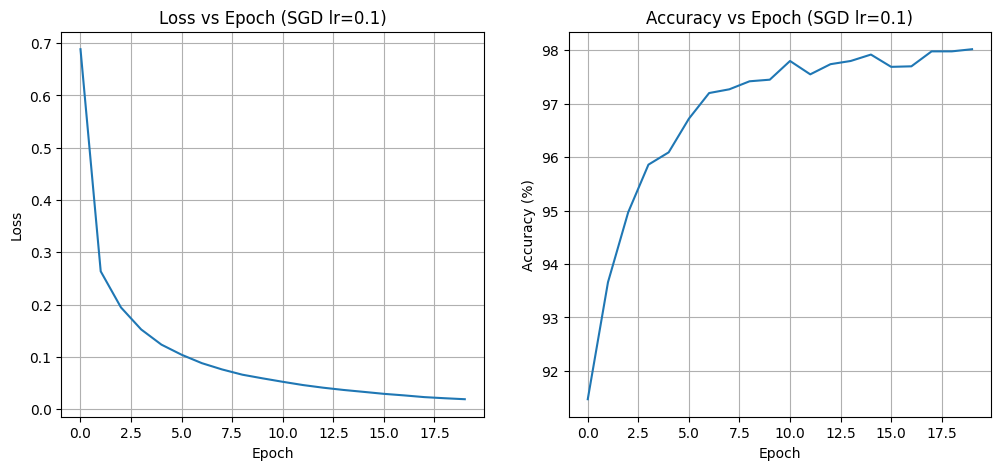

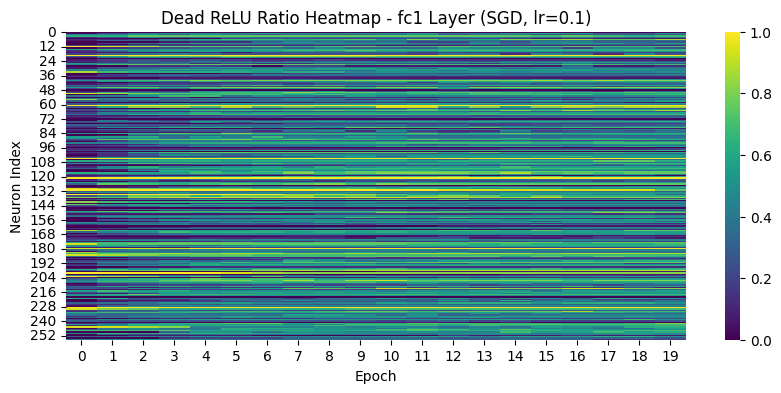

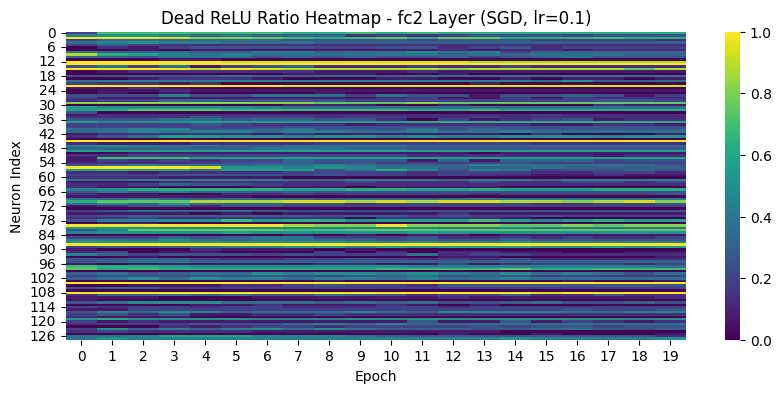

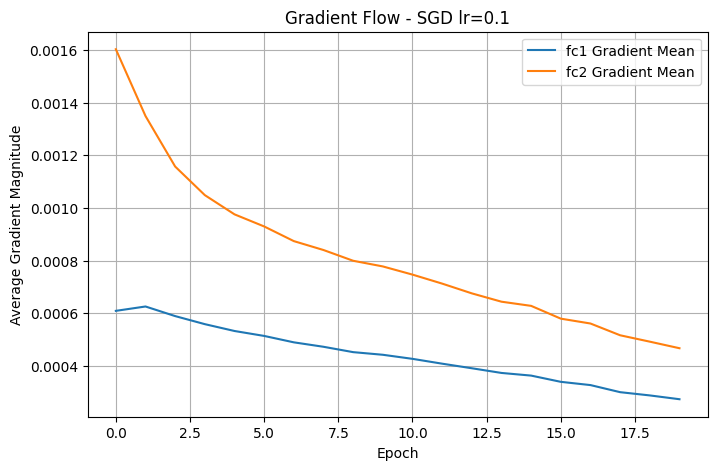

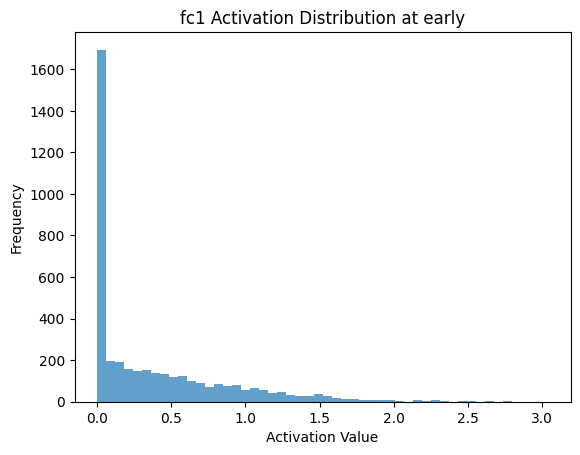

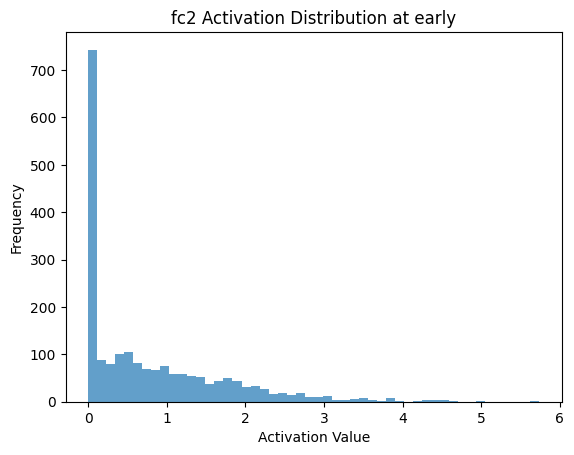

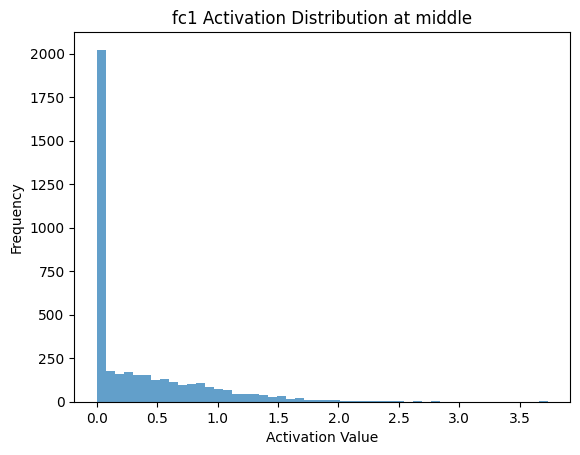

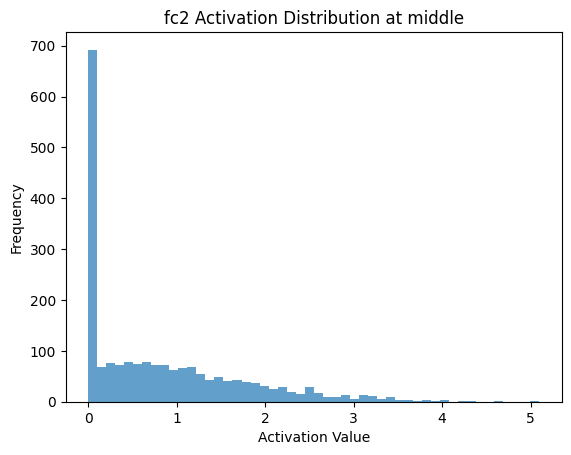

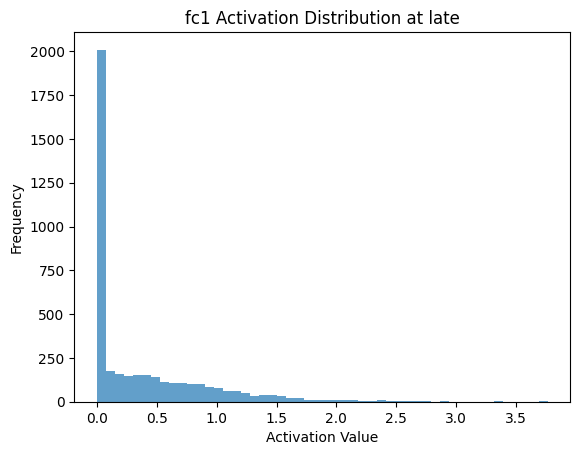

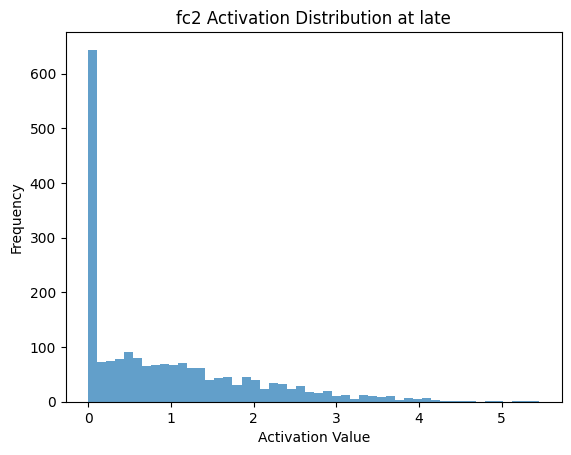

Training with optimizer=SGD+Momentum, lr=0.1
Epoch 1/20, Loss: 0.3276, Accuracy: 96.51%
Epoch 2/20, Loss: 0.1023, Accuracy: 97.27%
Epoch 3/20, Loss: 0.0711, Accuracy: 97.45%
Epoch 4/20, Loss: 0.0531, Accuracy: 97.77%
Epoch 5/20, Loss: 0.0422, Accuracy: 97.71%
Epoch 6/20, Loss: 0.0326, Accuracy: 98.06%
Epoch 7/20, Loss: 0.0238, Accuracy: 98.14%
Epoch 8/20, Loss: 0.0220, Accuracy: 98.21%
Epoch 9/20, Loss: 0.0172, Accuracy: 97.83%
Epoch 10/20, Loss: 0.0156, Accuracy: 98.26%
Epoch 11/20, Loss: 0.0119, Accuracy: 97.57%
Epoch 12/20, Loss: 0.0127, Accuracy: 98.18%
Epoch 13/20, Loss: 0.0089, Accuracy: 98.14%
Epoch 14/20, Loss: 0.0102, Accuracy: 97.69%
Epoch 15/20, Loss: 0.0078, Accuracy: 98.31%
Epoch 16/20, Loss: 0.0049, Accuracy: 98.29%
Epoch 17/20, Loss: 0.0127, Accuracy: 98.41%
Epoch 18/20, Loss: 0.0080, Accuracy: 98.32%
Epoch 19/20, Loss: 0.0063, Accuracy: 98.31%
Epoch 20/20, Loss: 0.0074, Accuracy: 98.12%


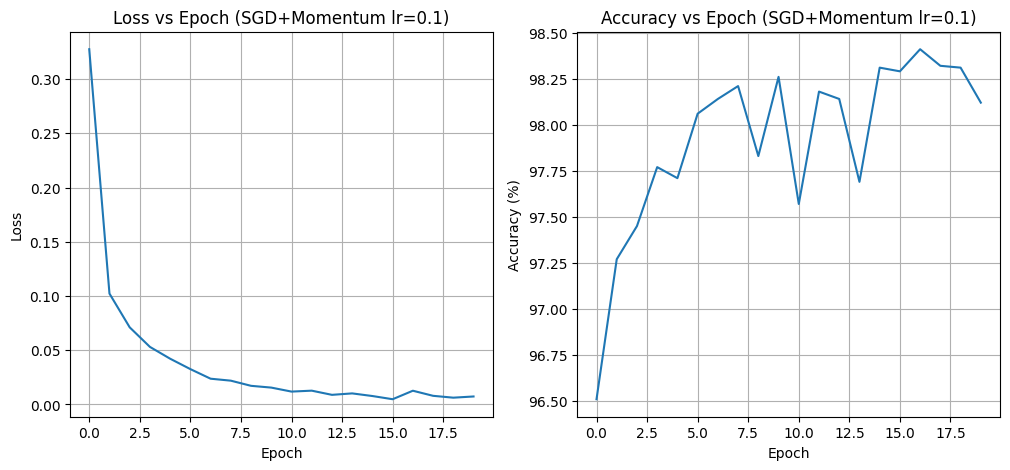

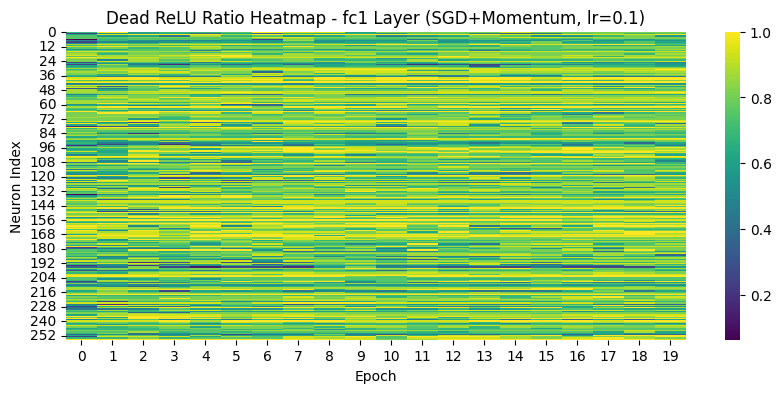

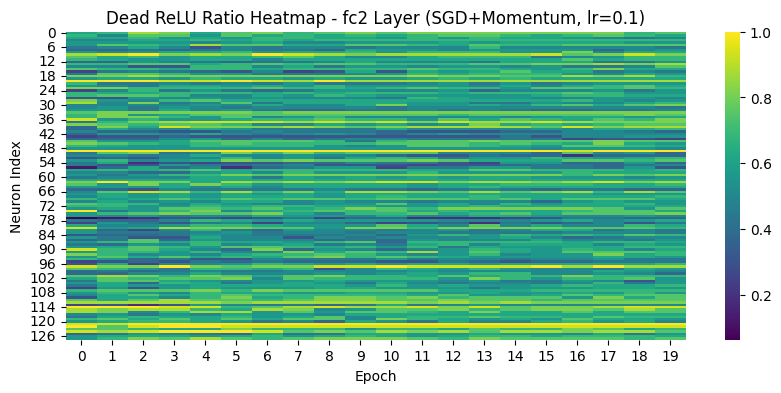

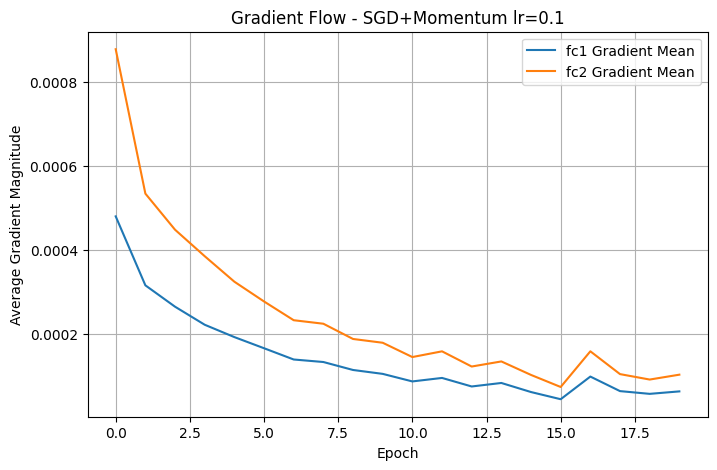

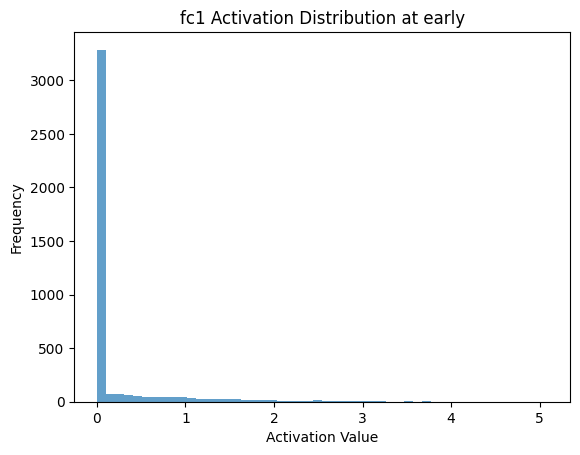

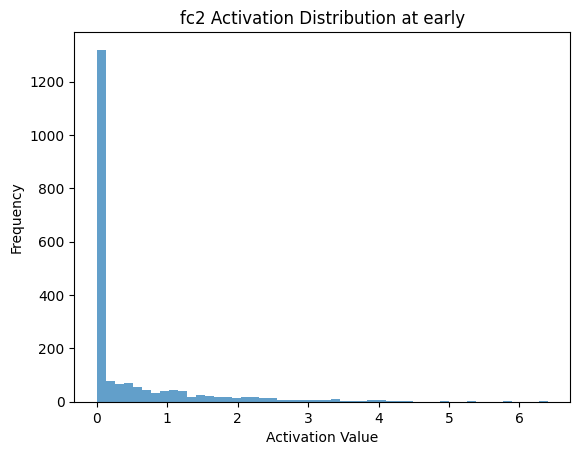

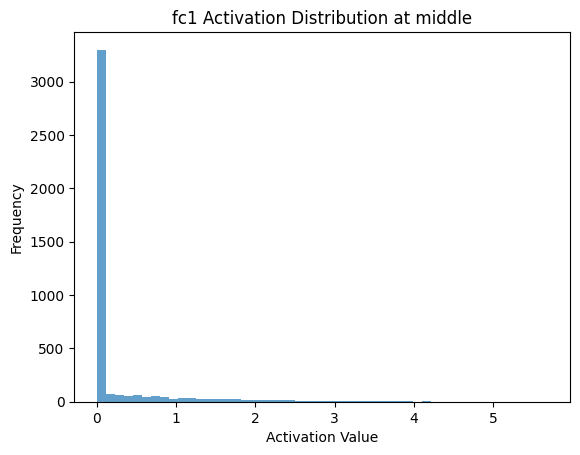

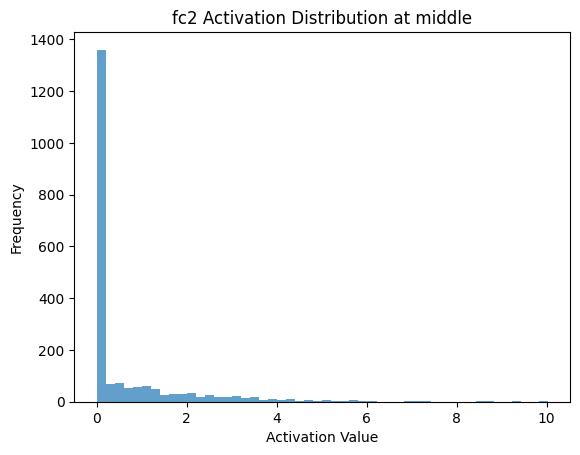

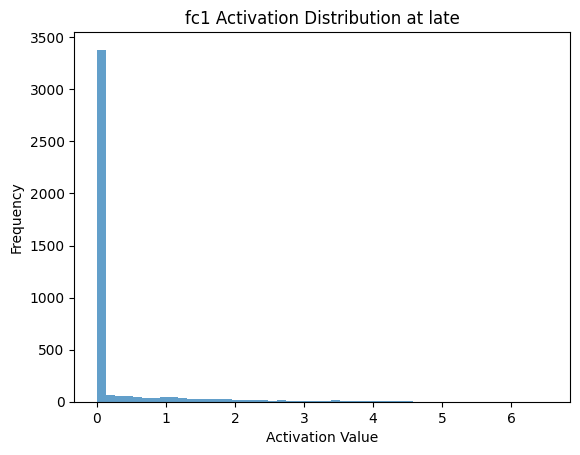

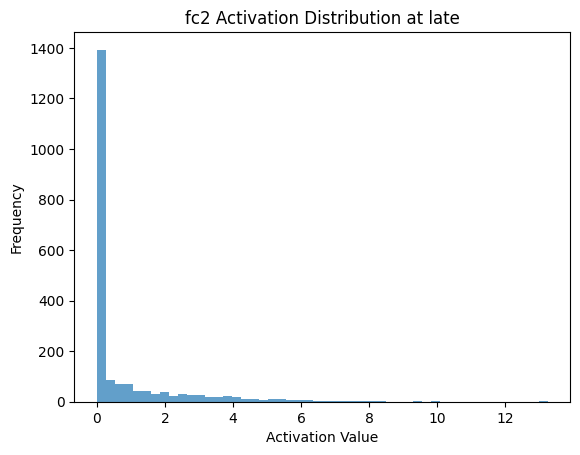

Training with optimizer=Adam, lr=0.1
Epoch 1/20, Loss: 1.4945, Accuracy: 67.59%
Epoch 2/20, Loss: 0.9449, Accuracy: 61.55%
Epoch 3/20, Loss: 0.8598, Accuracy: 70.49%
Epoch 4/20, Loss: 0.8612, Accuracy: 66.53%
Epoch 5/20, Loss: 1.0599, Accuracy: 62.47%
Epoch 6/20, Loss: 1.3445, Accuracy: 54.72%
Epoch 7/20, Loss: 1.3253, Accuracy: 38.51%
Epoch 8/20, Loss: 1.3836, Accuracy: 44.66%
Epoch 9/20, Loss: 1.3708, Accuracy: 43.50%
Epoch 10/20, Loss: 1.6230, Accuracy: 26.43%
Epoch 11/20, Loss: 1.9661, Accuracy: 18.13%
Epoch 12/20, Loss: 2.0102, Accuracy: 20.90%
Epoch 13/20, Loss: 1.9481, Accuracy: 20.65%
Epoch 14/20, Loss: 1.9277, Accuracy: 20.91%
Epoch 15/20, Loss: 1.9134, Accuracy: 20.09%
Epoch 16/20, Loss: 1.8999, Accuracy: 18.49%
Epoch 17/20, Loss: 1.9737, Accuracy: 19.69%
Epoch 18/20, Loss: 1.9262, Accuracy: 17.80%
Epoch 19/20, Loss: 1.9693, Accuracy: 20.41%
Epoch 20/20, Loss: 1.9093, Accuracy: 21.01%


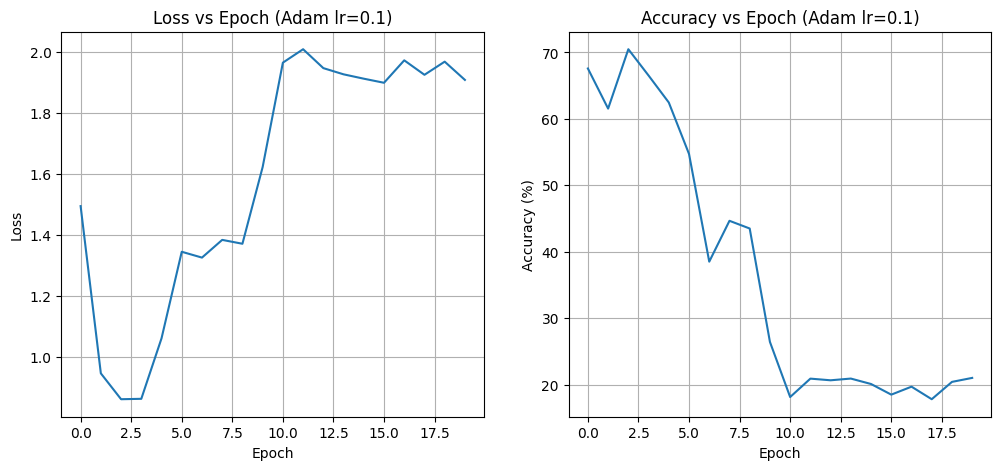

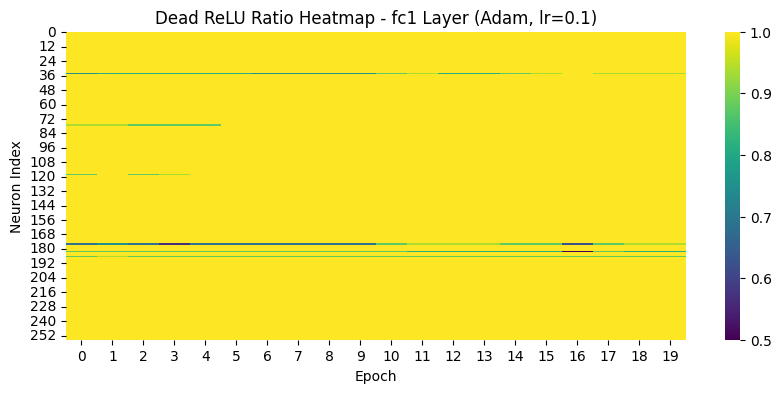

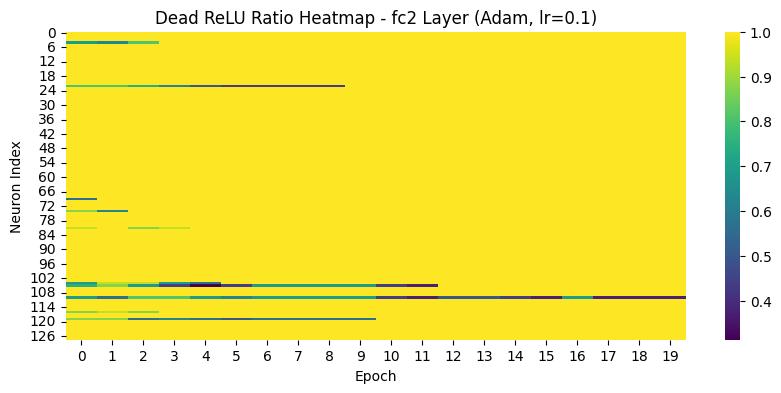

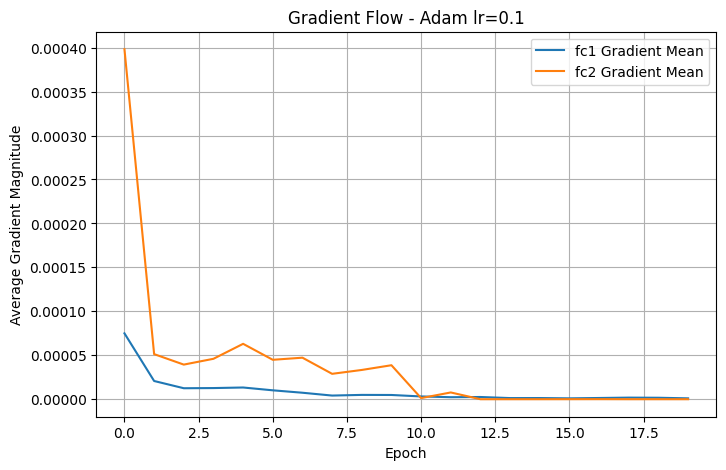

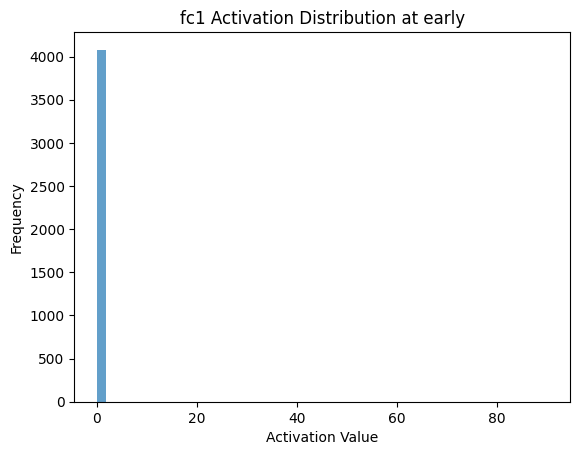

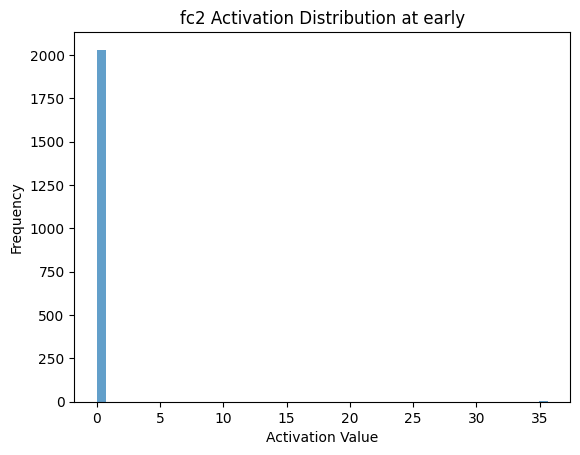

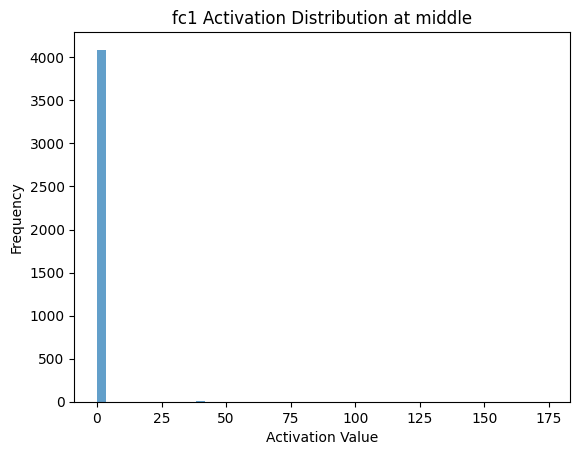

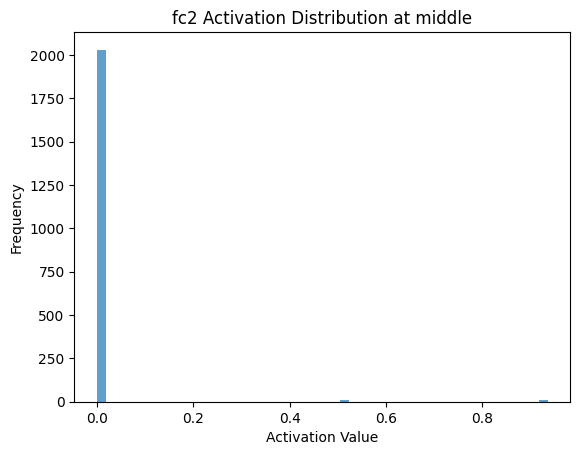

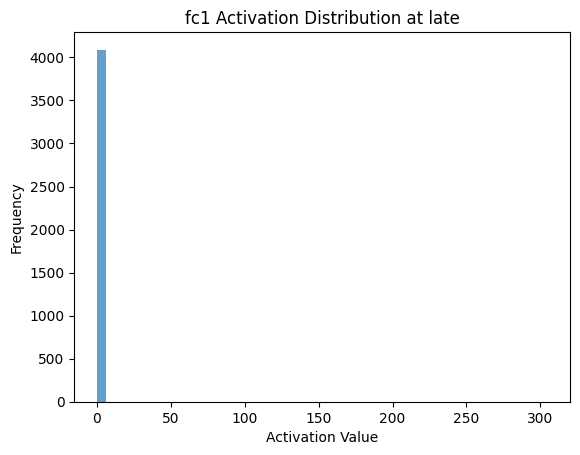

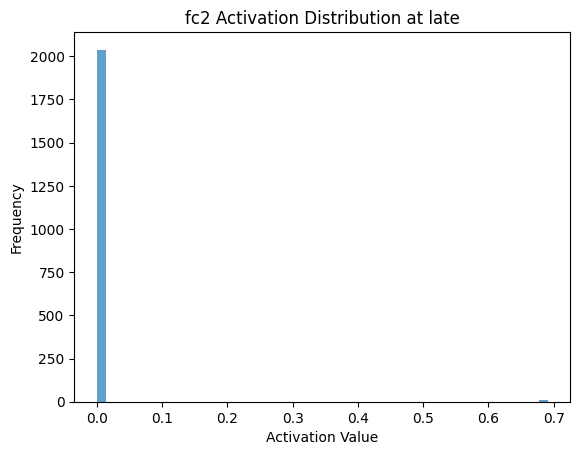

Training with optimizer=SGD, lr=0.01
Epoch 1/20, Loss: 2.1571, Accuracy: 68.03%
Epoch 2/20, Loss: 1.1969, Accuracy: 81.96%
Epoch 3/20, Loss: 0.6137, Accuracy: 86.47%
Epoch 4/20, Loss: 0.4686, Accuracy: 88.63%
Epoch 5/20, Loss: 0.4044, Accuracy: 89.60%
Epoch 6/20, Loss: 0.3680, Accuracy: 90.40%
Epoch 7/20, Loss: 0.3440, Accuracy: 90.65%
Epoch 8/20, Loss: 0.3261, Accuracy: 91.17%
Epoch 9/20, Loss: 0.3115, Accuracy: 91.70%
Epoch 10/20, Loss: 0.2989, Accuracy: 91.79%
Epoch 11/20, Loss: 0.2877, Accuracy: 92.13%
Epoch 12/20, Loss: 0.2777, Accuracy: 92.40%
Epoch 13/20, Loss: 0.2682, Accuracy: 92.86%
Epoch 14/20, Loss: 0.2595, Accuracy: 92.94%
Epoch 15/20, Loss: 0.2511, Accuracy: 93.31%
Epoch 16/20, Loss: 0.2429, Accuracy: 93.47%
Epoch 17/20, Loss: 0.2355, Accuracy: 93.67%
Epoch 18/20, Loss: 0.2283, Accuracy: 93.83%
Epoch 19/20, Loss: 0.2210, Accuracy: 93.84%
Epoch 20/20, Loss: 0.2145, Accuracy: 94.11%


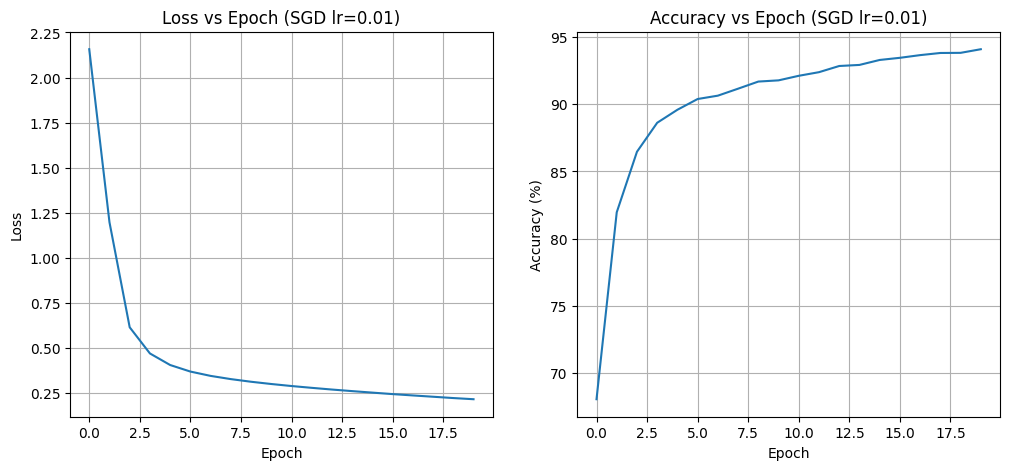

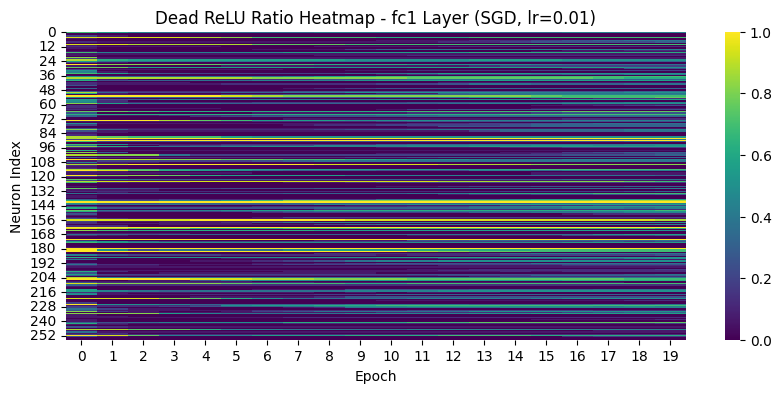

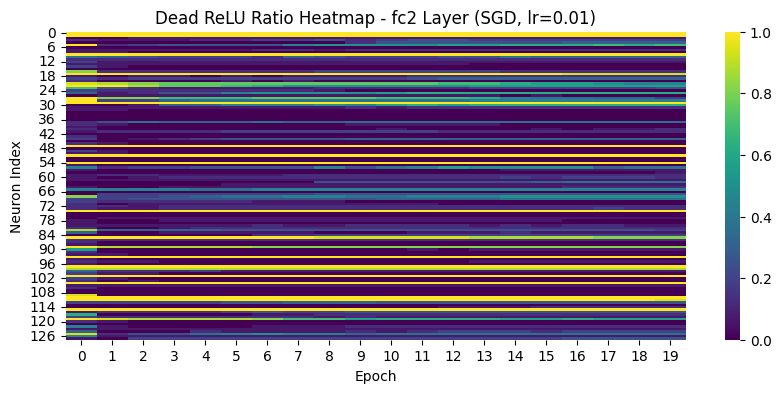

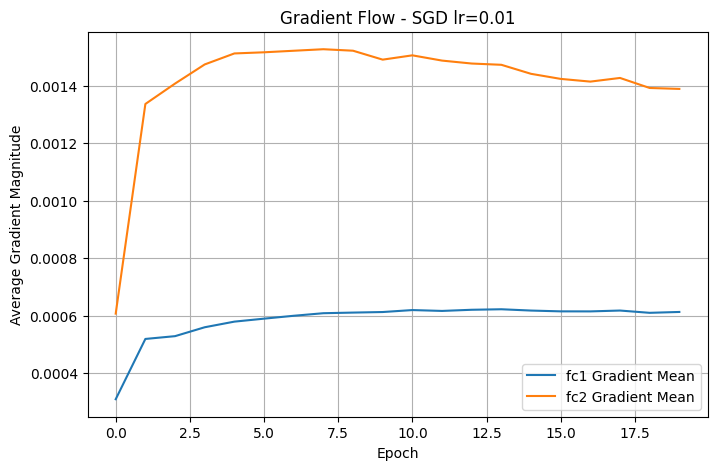

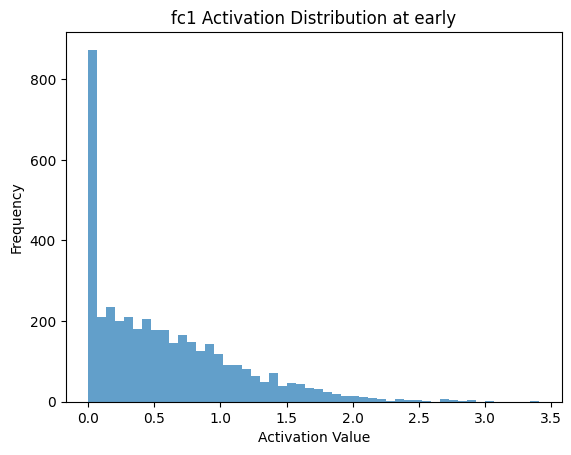

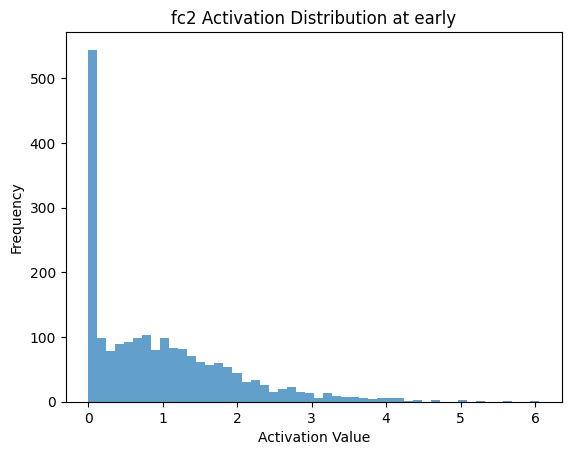

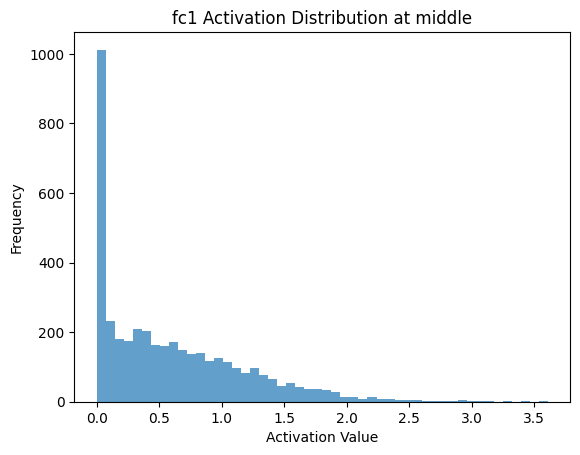

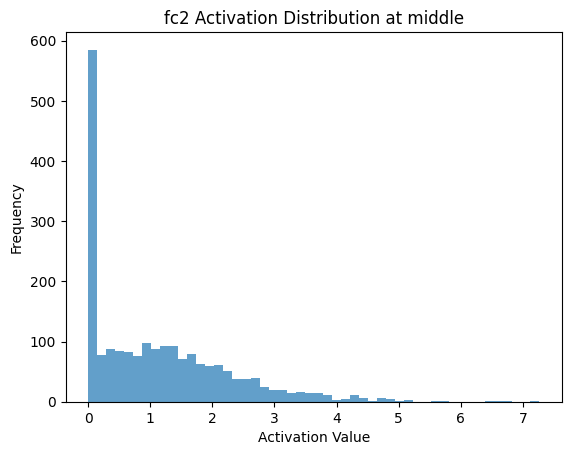

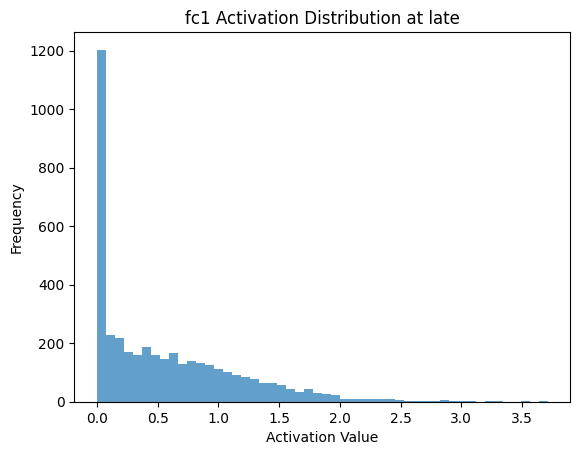

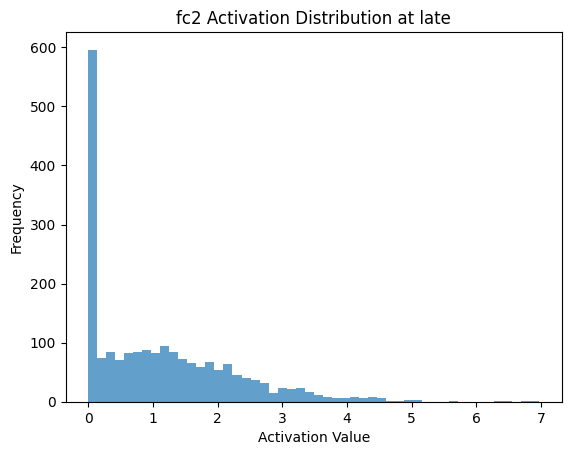

Training with optimizer=SGD+Momentum, lr=0.01
Epoch 1/20, Loss: 0.7391, Accuracy: 91.57%
Epoch 2/20, Loss: 0.2632, Accuracy: 94.07%
Epoch 3/20, Loss: 0.1961, Accuracy: 94.93%
Epoch 4/20, Loss: 0.1542, Accuracy: 95.83%
Epoch 5/20, Loss: 0.1263, Accuracy: 96.50%
Epoch 6/20, Loss: 0.1053, Accuracy: 96.90%
Epoch 7/20, Loss: 0.0900, Accuracy: 96.97%
Epoch 8/20, Loss: 0.0779, Accuracy: 97.17%
Epoch 9/20, Loss: 0.0679, Accuracy: 97.51%
Epoch 10/20, Loss: 0.0599, Accuracy: 97.47%
Epoch 11/20, Loss: 0.0530, Accuracy: 97.65%
Epoch 12/20, Loss: 0.0467, Accuracy: 97.73%
Epoch 13/20, Loss: 0.0415, Accuracy: 97.91%
Epoch 14/20, Loss: 0.0367, Accuracy: 97.92%
Epoch 15/20, Loss: 0.0328, Accuracy: 97.70%
Epoch 16/20, Loss: 0.0287, Accuracy: 97.90%
Epoch 17/20, Loss: 0.0261, Accuracy: 97.94%


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict

# --- 데이터 로드 및 전처리 ---
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# --- 모델 정의 ---
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(x.size(0), -1)
        self.a1 = self.relu(self.fc1(x))   # Activation 저장
        self.a2 = self.relu(self.fc2(self.a1))
        out = self.fc3(self.a2)
        return out

# --- Helper 함수 ---
def evaluate(model, dataloader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for x,y in dataloader:
            x, y = x.to(device), y.to(device)
            out = model(x)
            pred = out.argmax(dim=1)
            correct += (pred==y).sum().item()
            total += y.size(0)
    return correct/total * 100

def dead_relu_ratio(activation):
    # activation tensor (batch, neurons)
    dead = (activation <= 0).float()
    ratio = dead.mean(dim=0).cpu().numpy()
    return ratio

def plot_heatmap(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,4))
    sns.heatmap(data, cmap='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def plot_loss_acc(history, title_suffix):
    epochs = len(history['loss'])
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(range(epochs), history['loss'], label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Loss vs Epoch ({title_suffix})')
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(range(epochs), history['acc'], label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title(f'Accuracy vs Epoch ({title_suffix})')
    plt.grid(True)
    plt.show()

def plot_activation_distribution(activations, layer_name, epoch_stage):
    # activations : tensor [batch, neuron]
    data = activations.detach().cpu().numpy().flatten()
    plt.hist(data, bins=50, alpha=0.7)
    plt.title(f'{layer_name} Activation Distribution at {epoch_stage}')
    plt.xlabel('Activation Value')
    plt.ylabel('Frequency')
    plt.show()

# --- 메인 학습 루프 ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

learning_rates = [0.1, 0.01, 0.001]
optimizers_to_test = ['SGD', 'SGD+Momentum', 'Adam']
num_epochs = 20

# 결과 저장용
results = defaultdict(dict)

for lr in learning_rates:
    for opt_name in optimizers_to_test:
        print(f'Training with optimizer={opt_name}, lr={lr}')

        model = SimpleMLP().to(device)
        if opt_name == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr)
        elif opt_name == 'SGD+Momentum':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
        else:  # Adam
            optimizer = optim.Adam(model.parameters(), lr=lr)

        criterion = nn.CrossEntropyLoss()

        history = {'loss': [], 'acc': []}

        dead_relu_record_layer1 = []
        dead_relu_record_layer2 = []

        grad_record_layer1 = []
        grad_record_layer2 = []

        activation_distributions = {'early': None, 'middle': None, 'late': None}

        total_batches = len(trainloader)

        for epoch in range(num_epochs):
            model.train()
            running_loss = 0.0

            for i, (x, y) in enumerate(trainloader):
                x, y = x.to(device), y.to(device)
                optimizer.zero_grad()
                out = model(x)
                loss = criterion(out, y)
                loss.backward()

                # Gradient 소실 확인을 위해 각 layer weight gradient 평균 저장
                grad_layer1 = model.fc1.weight.grad.abs().mean().item()
                grad_layer2 = model.fc2.weight.grad.abs().mean().item()
                grad_record_layer1.append(grad_layer1)
                grad_record_layer2.append(grad_layer2)

                optimizer.step()
                running_loss += loss.item()

            avg_loss = running_loss / total_batches
            acc = evaluate(model, testloader, device)
            history['loss'].append(avg_loss)
            history['acc'].append(acc)

            # Dead ReLU 비율 계산
            dead1 = dead_relu_ratio(model.a1)
            dead2 = dead_relu_ratio(model.a2)
            dead_relu_record_layer1.append(dead1)
            dead_relu_record_layer2.append(dead2)

            # Activation 분포 저장 (초반: epoch 2, 중반: epoch 10, 후반: epoch 18)
            if epoch == 2:
                activation_distributions['early'] = {
                    'fc1': model.a1.detach().cpu().clone(),
                    'fc2': model.a2.detach().cpu().clone()
                }
            if epoch == 10:
                activation_distributions['middle'] = {
                    'fc1': model.a1.detach().cpu().clone(),
                    'fc2': model.a2.detach().cpu().clone()
                }
            if epoch == 18:
                activation_distributions['late'] = {
                    'fc1': model.a1.detach().cpu().clone(),
                    'fc2': model.a2.detach().cpu().clone()
                }

            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2f}%")

        # Dead ReLU 비율 히트맵 (각 layer 별 뉴런별 비율, epoch별)
        dead_relu_record_layer1 = np.array(dead_relu_record_layer1).T  # shape: (neurons, epochs)
        dead_relu_record_layer2 = np.array(dead_relu_record_layer2).T

        # Gradient 흐름 시각화: epoch 당 평균 gradient 저장 (평균내기 위해 reshape)
        grad_record_layer1 = np.array(grad_record_layer1).reshape(num_epochs, -1).mean(axis=1)
        grad_record_layer2 = np.array(grad_record_layer2).reshape(num_epochs, -1).mean(axis=1)

        # 시각화
        plot_loss_acc(history, f'{opt_name} lr={lr}')

        plot_heatmap(dead_relu_record_layer1,
                     f'Dead ReLU Ratio Heatmap - fc1 Layer ({opt_name}, lr={lr})',
                     'Epoch', 'Neuron Index')
        plot_heatmap(dead_relu_record_layer2,
                     f'Dead ReLU Ratio Heatmap - fc2 Layer ({opt_name}, lr={lr})',
                     'Epoch', 'Neuron Index')

        plt.figure(figsize=(8,5))
        plt.plot(range(num_epochs), grad_record_layer1, label='fc1 Gradient Mean')
        plt.plot(range(num_epochs), grad_record_layer2, label='fc2 Gradient Mean')
        plt.title(f'Gradient Flow - {opt_name} lr={lr}')
        plt.xlabel('Epoch')
        plt.ylabel('Average Gradient Magnitude')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Activation 분포 시각화
        for stage in ['early', 'middle', 'late']:
            for layer in ['fc1', 'fc2']:
                plot_activation_distribution(activation_distributions[stage][layer], layer, stage)

        # 수렴 속도 및 안정성 기준 간단 계산
        final_acc = history['acc'][-1]
        # 수렴 속도: epoch 당 acc 변화량으로 간단 계산 (acc 증가가 1% 이상 된 epoch 수)
        acc_changes = np.diff(history['acc'])
        convergence_speed = np.sum(acc_changes > 1)
        # 안정성: loss 변화량이 적으면 안정적이라고 가정 (loss std dev 낮을수록 안정적)
        stability = np.std(history['loss'])

        results[(opt_name, lr)] = {
            'final_accuracy': final_acc,
            'convergence_speed': convergence_speed,
            'stability': stability
        }

# --- 결과 정리 표 출력 ---
print("Optimizer\tLearning Rate\t최종 정확도(%)\t수렴 속도(Epoch 수)\t안정성(손실 표준편차)")
print("-"*70)
for (opt_name, lr), res in results.items():
    print(f"{opt_name}\t{lr}\t{res['final_accuracy']:.2f}\t\t{res['convergence_speed']}\t\t{res['stability']:.4f}")
